## Acquisition Analytics

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.  

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

demgrphc = pd.read_csv("Demographic data.csv", sep=",")
demgrphc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [3]:
cred_bureau = pd.read_csv("Credit Bureau data.csv", sep=",")
cred_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [4]:
demgrphc.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [5]:
cred_bureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

#### Checking for duplicates

In [6]:
print(any(demgrphc['Application ID'].duplicated())) 
print(any(cred_bureau['Application ID'].duplicated())) 

True
True


#### We will remove all the values corresponding to duplicate values as we dont know which application id  demographic data is mapped in credit bureau data. we ill use false option while droping duplicates

In [7]:
demgrphc=demgrphc.drop_duplicates(subset="Application ID",keep=False)
cred_bureau=cred_bureau.drop_duplicates(subset="Application ID",keep=False)
print(any(demgrphc['Application ID'].duplicated())) 
print(any(cred_bureau['Application ID'].duplicated())) 


False
False


#### General Assumptions:
###### The age of person getting credit card must be greater than 17 because primary credit card cannnot be issued below 18 years of age. The income of the person must be greater than 0 for credit card being issued to him. We will filter the demographic dataset based on this and then merge with cred bureau data.

In [8]:
demgrphc = demgrphc[demgrphc.Age >= 18]
demgrphc = demgrphc[demgrphc.Income > 0]
demgrphc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71118 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71118 non-null int64
Age                                            71118 non-null int64
Gender                                         71117 non-null object
Marital Status (at the time of application)    71113 non-null object
No of dependents                               71116 non-null float64
Income                                         71118 non-null float64
Education                                      70999 non-null object
Profession                                     71106 non-null object
Type of residence                              71110 non-null object
No of months in current residence              71118 non-null int64
No of months in current company                71118 non-null int64
Performance Tag                                69693 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


In [9]:
round(100*(demgrphc.isnull().sum()/len(demgrphc.index)), 4)

Application ID                                 0.0000
Age                                            0.0000
Gender                                         0.0014
Marital Status (at the time of application)    0.0070
No of dependents                               0.0028
Income                                         0.0000
Education                                      0.1673
Profession                                     0.0169
Type of residence                              0.0112
No of months in current residence              0.0000
No of months in current company                0.0000
Performance Tag                                2.0037
dtype: float64

#### We can drop all the rows which have nulls for any column as these are very less. We will not treat it as seperate category for categorical variables as the number of events will be less than 5 % and will not add any significance to the model.

### We will not drop rows where performance tag is null as these are rejected prospects and we will use this data for model evaluation.

In [10]:
demgrphc.dropna(subset=demgrphc.columns.difference(['Performance Tag']),inplace=True)
round(100*(demgrphc.isnull().sum()/len(demgrphc.index)), 4)

Application ID                                 0.000
Age                                            0.000
Gender                                         0.000
Marital Status (at the time of application)    0.000
No of dependents                               0.000
Income                                         0.000
Education                                      0.000
Profession                                     0.000
Type of residence                              0.000
No of months in current residence              0.000
No of months in current company                0.000
Performance Tag                                2.005
dtype: float64

In [11]:
demgrphc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70971 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 70971 non-null int64
Age                                            70971 non-null int64
Gender                                         70971 non-null object
Marital Status (at the time of application)    70971 non-null object
No of dependents                               70971 non-null float64
Income                                         70971 non-null float64
Education                                      70971 non-null object
Profession                                     70971 non-null object
Type of residence                              70971 non-null object
No of months in current residence              70971 non-null int64
No of months in current company                70971 non-null int64
Performance Tag                                69548 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.0+ MB


In [12]:
round(100*(cred_bureau.isnull().sum()/len(cred_bureau.index)), 4)

Application ID                                                     0.0000
No of times 90 DPD or worse in last 6 months                       0.0000
No of times 60 DPD or worse in last 6 months                       0.0000
No of times 30 DPD or worse in last 6 months                       0.0000
No of times 90 DPD or worse in last 12 months                      0.0000
No of times 60 DPD or worse in last 12 months                      0.0000
No of times 30 DPD or worse in last 12 months                      0.0000
Avgas CC Utilization in last 12 months                             1.4841
No of trades opened in last 6 months                               0.0014
No of trades opened in last 12 months                              0.0000
No of PL trades opened in last 6 months                            0.0000
No of PL trades opened in last 12 months                           0.0000
No of Inquiries in last 6 months (excluding home & auto loans)     0.0000
No of Inquiries in last 12 months (exc

In [13]:
import math
def cred_utilization_binning(rec):
    if(math.isnan(rec)):
        return "missing"
    elif(rec>=0 and rec<15):
        return "0_to_15"
    elif(rec>=15 and rec<30):
        return "15_to_30"
    elif(rec>=30 and rec<45):
        return "30_to_45"
    elif(rec>=45 and rec<60):
        return "45_to_60"
    elif(rec>=60 and rec<75):
        return "60_to_75"
    elif(rec>=75 and rec<90):
        return "75_to_90"
    else:
        return "Greater_than_90"

In [14]:
cred_bureau['Avgas CC Utilization in last 12 months']=cred_bureau['Avgas CC Utilization in last 12 months'].apply(lambda x: cred_utilization_binning(x))
round(100*(cred_bureau.isnull().sum()/len(cred_bureau.index)), 4)

Application ID                                                     0.0000
No of times 90 DPD or worse in last 6 months                       0.0000
No of times 60 DPD or worse in last 6 months                       0.0000
No of times 30 DPD or worse in last 6 months                       0.0000
No of times 90 DPD or worse in last 12 months                      0.0000
No of times 60 DPD or worse in last 12 months                      0.0000
No of times 30 DPD or worse in last 12 months                      0.0000
Avgas CC Utilization in last 12 months                             0.0000
No of trades opened in last 6 months                               0.0014
No of trades opened in last 12 months                              0.0000
No of PL trades opened in last 6 months                            0.0000
No of PL trades opened in last 12 months                           0.0000
No of Inquiries in last 6 months (excluding home & auto loans)     0.0000
No of Inquiries in last 12 months (exc

In [15]:
cred_bureau.dropna(subset=cred_bureau.columns.difference(['Performance Tag']),inplace=True)
round(100*(cred_bureau.isnull().sum()/len(cred_bureau.index)), 4)

Application ID                                                     0.0000
No of times 90 DPD or worse in last 6 months                       0.0000
No of times 60 DPD or worse in last 6 months                       0.0000
No of times 30 DPD or worse in last 6 months                       0.0000
No of times 90 DPD or worse in last 12 months                      0.0000
No of times 60 DPD or worse in last 12 months                      0.0000
No of times 30 DPD or worse in last 12 months                      0.0000
Avgas CC Utilization in last 12 months                             0.0000
No of trades opened in last 6 months                               0.0000
No of trades opened in last 12 months                              0.0000
No of PL trades opened in last 6 months                            0.0000
No of PL trades opened in last 12 months                           0.0000
No of Inquiries in last 6 months (excluding home & auto loans)     0.0000
No of Inquiries in last 12 months (exc

In [16]:
cred_bureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71016 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71016 non-null int64
No of times 90 DPD or worse in last 6 months                       71016 non-null int64
No of times 60 DPD or worse in last 6 months                       71016 non-null int64
No of times 30 DPD or worse in last 6 months                       71016 non-null int64
No of times 90 DPD or worse in last 12 months                      71016 non-null int64
No of times 60 DPD or worse in last 12 months                      71016 non-null int64
No of times 30 DPD or worse in last 12 months                      71016 non-null int64
Avgas CC Utilization in last 12 months                             71016 non-null object
No of trades opened in last 6 months                               71016 non-null float64
No of trades opened in last 12 months                              71016 non-null int64
No of PL

In [17]:
cred_bureau.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,0_to_15,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,0_to_15,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,0_to_15,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,0_to_15,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,0_to_15,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


### Here we see we still have 98 % of dataset available without any missing values except in performance tag which we will handle for model evaluation and also the average utilization in converted to categorical bins. We will join the datasets on application id and then we will calculate WOE and find the important predictor variables using the Information value strategy. After that we will do univariate and bivariate analysis on it.

In [18]:
merge_df=pd.merge(demgrphc,cred_bureau,on="Application ID",suffixes=('_dem', '_cred'))
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70699 entries, 0 to 70698
Data columns (total 30 columns):
Application ID                                                     70699 non-null int64
Age                                                                70699 non-null int64
Gender                                                             70699 non-null object
Marital Status (at the time of application)                        70699 non-null object
No of dependents                                                   70699 non-null float64
Income                                                             70699 non-null float64
Education                                                          70699 non-null object
Profession                                                         70699 non-null object
Type of residence                                                  70699 non-null object
No of months in current residence                                  70699 non-null int64
No

In [19]:
merge_df.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_dem                                                1423
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

#### Checking if Performance tag is same for both the datasets. If it is same we will drop one column

In [20]:
x=merge_df[merge_df["Performance Tag_dem"]!=merge_df["Performance Tag_cred"]]
x.isnull().sum()


Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_dem                                                1423
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 69010 to 70648
Data columns (total 30 columns):
Application ID                                                     1423 non-null int64
Age                                                                1423 non-null int64
Gender                                                             1423 non-null object
Marital Status (at the time of application)                        1423 non-null object
No of dependents                                                   1423 non-null float64
Income                                                             1423 non-null float64
Education                                                          1423 non-null object
Profession                                                         1423 non-null object
Type of residence                                                  1423 non-null object
No of months in current residence                                  1423 non-null int64
No of mon

###### Here we can see there is no records where performance tag is different in both datasets , we can remove one column and missing values we will impute using the WOE. Also we will drop the application Id variable as it is unique identifier and it will not be used for model building.

In [22]:
merge_df = merge_df.drop('Performance Tag_dem', axis=1)
app_id_df = merge_df[['Application ID']]
merge_df = merge_df.drop('Application ID', axis=1)
app_id_df.shape

(70699, 1)

In [23]:
app_id_df.head()

,Application ID
0,954457215
1,432830445
2,941387308
3,392161677
4,182011211


### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on demographic features and look for patterns.

First, we will look at the client data.

- Age
- Gender
- Marital Status
- No of dependents
- Income
- Education
- Profession
- Type of residence
- No of months in current residence
- No of months in current company




In [24]:
def continuous_binning_eda(data_df,indpndnt_var,target_var,bin_interval=10):
    bins = np.arange(0,data_df[indpndnt_var].max() + 2, bin_interval)
    merge_df[indpndnt_var+'_bins'] = pd.cut(data_df[indpndnt_var], bins, include_lowest=True)
    count_defaults = merge_df.groupby(indpndnt_var+'_bins')[target_var].sum().reset_index(name = 'count_defaults')
    No_of_prospect = merge_df.groupby(indpndnt_var+'_bins')[target_var].count().reset_index(name = 'No_of_prospects')
    agg_df = count_defaults.merge(No_of_prospect, on = indpndnt_var+'_bins')
    agg_df['default_rate'] = 100*(agg_df['count_defaults']/agg_df['No_of_prospects']).round(4)
    return agg_df

In [25]:
def categorical_eda(data_df,indpndnt_var,target_var):
    count_defaults = data_df.groupby(indpndnt_var)[target_var].sum().reset_index(name = 'count_defaults')
    No_of_prospect = data_df.groupby(indpndnt_var)[target_var].count().reset_index(name = 'No_of_prospects')
    agg_df = count_defaults.merge(No_of_prospect, on = indpndnt_var)
    agg_df['default_rate'] = 100*(agg_df['count_defaults']/agg_df['No_of_prospects']).round(4)
    return agg_df

In [26]:
def plot_agg_df(indpndnt_var,agg_df):
    ax = sns.barplot(x=indpndnt_var, y='default_rate', data=agg_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

#### Age

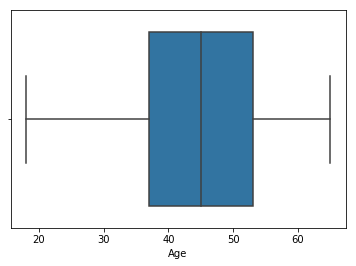

In [27]:
sns.boxplot(x='Age', data=merge_df)
plt.show()

In [28]:
agg_df=continuous_binning_eda(merge_df,'Age','Performance Tag_cred')
agg_df.head(10)

,Age_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 10.0]",0.0,0,NaN
1,"(10.0, 20.0]",2.0,73,2.74
2,"(20.0, 30.0]",237.0,5750,4.12
3,"(30.0, 40.0]",826.0,18528,4.46
4,"(40.0, 50.0]",954.0,22700,4.20
5,"(50.0, 60.0]",714.0,17430,4.10


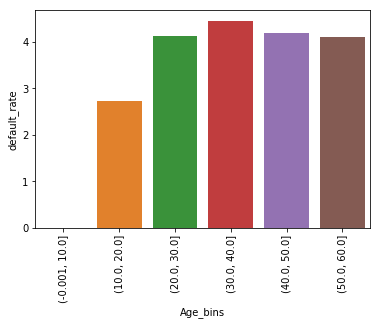

In [29]:
plot_agg_df('Age_bins',agg_df)

As we can see, the youngest age group is less likely to default.

Similarly, we will look at the relation between default rate and Gender. Note that since gender is already a categorical variable, we don't need to bucket the data

#### Gender

In [30]:
merge_df['Gender'].value_counts()

M    53989
F    16710
Name: Gender, dtype: int64

In [31]:
agg_df=categorical_eda(merge_df,'Gender','Performance Tag_cred')
agg_df.head(10)

,Gender,count_defaults,No_of_prospects,default_rate
0,F,716.0,16380,4.37
1,M,2215.0,52896,4.19


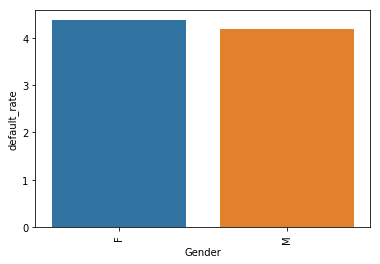

In [32]:
plot_agg_df('Gender',agg_df)

We see almost equal default rates in both Genders

#### Marital

In [33]:
merge_df['Marital Status (at the time of application)'].value_counts()

Married    60240
Single     10459
Name: Marital Status (at the time of application), dtype: int64

In [34]:
agg_df=categorical_eda(merge_df,'Marital Status (at the time of application)','Performance Tag_cred')
agg_df.head(10)

,Marital Status (at the time of application),count_defaults,No_of_prospects,default_rate
0,Married,2489.0,59059,4.21
1,Single,442.0,10217,4.33


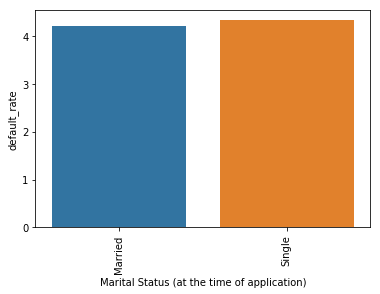

In [35]:
plot_agg_df('Marital Status (at the time of application)',agg_df)

You may note that there is a slight uptick in default rate for single customers, this can be attributed in part to the fact that people under the age of 20 are jobless and hence default chances are high. 

#### No of dependents

In [36]:
merge_df['No of dependents'].value_counts()

3.0    16138
1.0    15255
2.0    15156
4.0    12129
5.0    12021
Name: No of dependents, dtype: int64

In [37]:
agg_df=categorical_eda(merge_df,'No of dependents','Performance Tag_cred')
agg_df.head(10)

,No of dependents,count_defaults,No_of_prospects,default_rate
0,1.0,666.0,15086,4.41
1,2.0,586.0,14995,3.91
2,3.0,692.0,15505,4.46
3,4.0,490.0,11908,4.11
4,5.0,497.0,11782,4.22


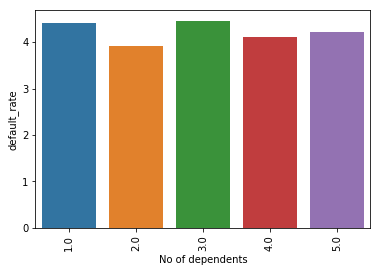

In [38]:
plot_agg_df('No of dependents',agg_df)

We can observe that prospects with 1 and 3 dependents are more likely to default.

#### Income

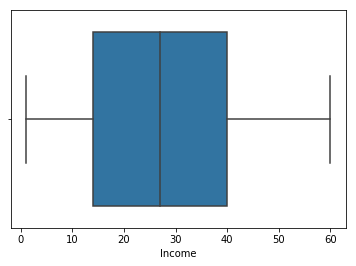

In [39]:
sns.boxplot(x='Income', data=merge_df)
plt.show()

In [40]:
agg_df=continuous_binning_eda(merge_df,'Income','Performance Tag_cred')
agg_df.head(10)

,Income_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 10.0]",709.0,12661,5.60
1,"(10.0, 20.0]",603.0,13255,4.55
2,"(20.0, 30.0]",595.0,13486,4.41
3,"(30.0, 40.0]",481.0,13533,3.55
4,"(40.0, 50.0]",383.0,10775,3.55
5,"(50.0, 60.0]",160.0,5566,2.87


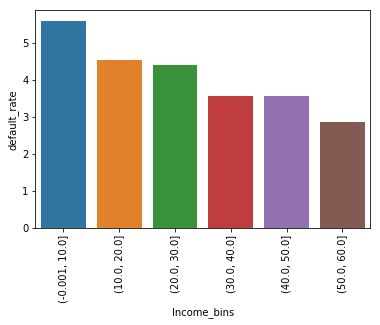

In [41]:
plot_agg_df('Income_bins',agg_df)

We can see that people will less income are more likely to default.

#### Education

In [42]:
merge_df['Education'].value_counts()

Professional    24656
Masters         23812
Bachelor        17592
Phd              4520
Others            119
Name: Education, dtype: int64

In [43]:
agg_df=categorical_eda(merge_df,'Education','Performance Tag_cred')
agg_df.head(10)

,Education,count_defaults,No_of_prospects,default_rate
0,Bachelor,738.0,17198,4.29
1,Masters,994.0,23323,4.26
2,Others,8.0,117,6.84
3,Phd,183.0,4435,4.13
4,Professional,1008.0,24203,4.16


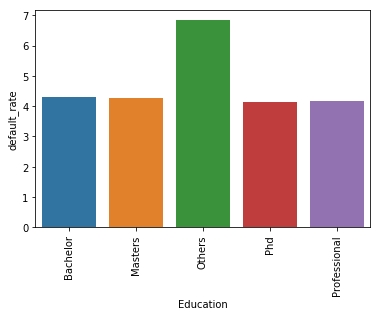

In [44]:
plot_agg_df('Education',agg_df)

People with other profession are more likely to default.

#### Type of residence

In [45]:
merge_df['Type of residence'].value_counts()

Rented                 52982
Owned                  14119
Living with Parents     1786
Company provided        1614
Others                   198
Name: Type of residence, dtype: int64

In [46]:
agg_df=categorical_eda(merge_df,'Type of residence','Performance Tag_cred')
agg_df.head(10)

,Type of residence,count_defaults,No_of_prospects,default_rate
0,Company provided,72.0,1587,4.54
1,Living with Parents,80.0,1746,4.58
2,Others,5.0,197,2.54
3,Owned,586.0,13879,4.22
4,Rented,2188.0,51867,4.22


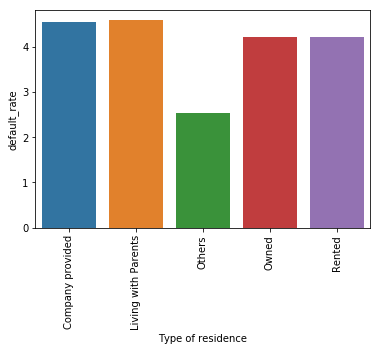

In [47]:
plot_agg_df('Type of residence',agg_df)

People with other type of residence are less likely to default.

#### No of months in current residence

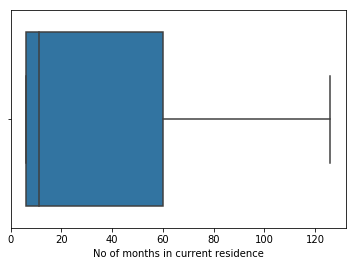

In [48]:
sns.boxplot(x='No of months in current residence', data=merge_df)
plt.show()

In [49]:
agg_df=continuous_binning_eda(merge_df,'No of months in current residence','Performance Tag_cred')
agg_df.head(15)

,No of months in current residence_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 10.0]",1152.0,34758,3.31
1,"(10.0, 20.0]",252.0,3765,6.69
2,"(20.0, 30.0]",227.0,3470,6.54
3,"(30.0, 40.0]",200.0,3513,5.69
4,"(40.0, 50.0]",177.0,3285,5.39
5,"(50.0, 60.0]",168.0,3156,5.32
6,"(60.0, 70.0]",129.0,2878,4.48
7,"(70.0, 80.0]",136.0,2800,4.86
8,"(80.0, 90.0]",125.0,2707,4.62
9,"(90.0, 100.0]",119.0,2752,4.32


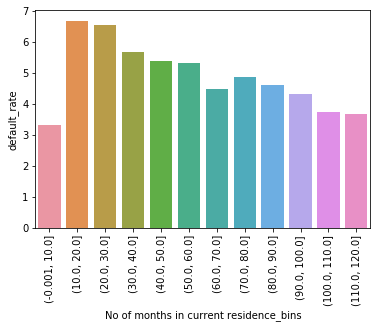

In [50]:
plot_agg_df('No of months in current residence_bins',agg_df)

We can observe that people who have currently shifted in their house and have stayed from 10 to 30 months are more likely to default.

#### No of months in current company

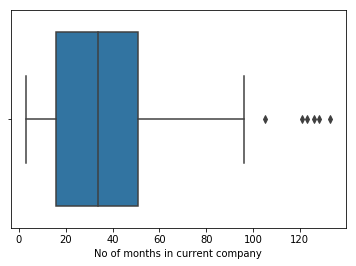

In [51]:
sns.boxplot(x='No of months in current company', data=merge_df)
plt.show()

In [52]:
# We can take all months greater than 90 as 90 for our analysis

merge_df['No of months in current company'][merge_df['No of months in current company']>90] =90

In [53]:
agg_df=continuous_binning_eda(merge_df,'No of months in current company','Performance Tag_cred')
agg_df.head(15)

,No of months in current company_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 10.0]",558.0,11467,4.87
1,"(10.0, 20.0]",489.0,9747,5.02
2,"(20.0, 30.0]",412.0,9979,4.13
3,"(30.0, 40.0]",428.0,10118,4.23
4,"(40.0, 50.0]",382.0,10152,3.76
5,"(50.0, 60.0]",316.0,9981,3.17
6,"(60.0, 70.0]",236.0,5546,4.26
7,"(70.0, 80.0]",110.0,2277,4.83
8,"(80.0, 90.0]",0.0,9,0.00


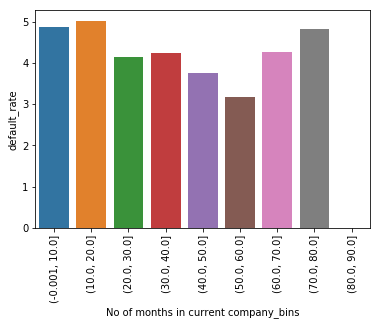

In [54]:
plot_agg_df('No of months in current company_bins',agg_df)

##### Now we will perform EDA on credit bureau data on the following variables and will try to analyse the trends in that.
- No of times 30 DPD or worse in last 12 months
- Avgas CC Utilization in last 12 months
- No of trades opened in last 12 months
- No of PL trades opened in last 12 months
- No of Inquiries in last 12 months (excluding home & auto loans)
- Presence of open home loan
- Outstanding Balance
- Total No of Trades
- Presence of open auto loan

#### No of times 30 DPD or worse in last 12 months

In [55]:
merge_df['No of times 30 DPD or worse in last 12 months'].value_counts()

0    44349
1    11461
2     6249
3     4442
4     2302
5     1162
6      545
7      160
8       27
9        2
Name: No of times 30 DPD or worse in last 12 months, dtype: int64

In [56]:
agg_df=categorical_eda(merge_df,'No of times 30 DPD or worse in last 12 months','Performance Tag_cred')
agg_df.head(10)

,No of times 30 DPD or worse in last 12 months,count_defaults,No_of_prospects,default_rate
0,0,1303.0,44344,2.94
1,1,517.0,11433,4.52
2,2,451.0,6100,7.39
3,3,348.0,4128,8.43
4,4,173.0,1918,9.02
5,5,88.0,849,10.37
6,6,38.0,373,10.19
7,7,11.0,107,10.28
8,8,2.0,23,8.70
9,9,0.0,1,0.00


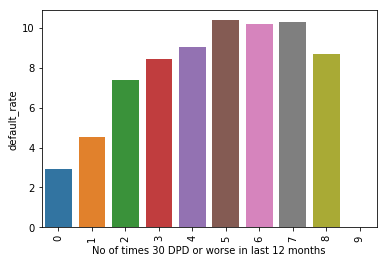

In [57]:
plot_agg_df('No of times 30 DPD or worse in last 12 months',agg_df)

In [58]:
merge_df['Avgas CC Utilization in last 12 months'].value_counts()

0_to_15            33915
15_to_30           10904
45_to_60            7039
30_to_45            6849
60_to_75            4666
Greater_than_90     4272
75_to_90            2276
missing              778
Name: Avgas CC Utilization in last 12 months, dtype: int64

In [59]:
agg_df=categorical_eda(merge_df,'Avgas CC Utilization in last 12 months','Performance Tag_cred')
agg_df.head(15)

,Avgas CC Utilization in last 12 months,count_defaults,No_of_prospects,default_rate
0,0_to_15,732.0,33852,2.16
1,15_to_30,514.0,10728,4.79
2,30_to_45,461.0,6556,7.03
3,45_to_60,491.0,6670,7.36
4,60_to_75,324.0,4397,7.37
5,75_to_90,151.0,2100,7.19
6,Greater_than_90,218.0,4230,5.15
7,missing,40.0,743,5.38


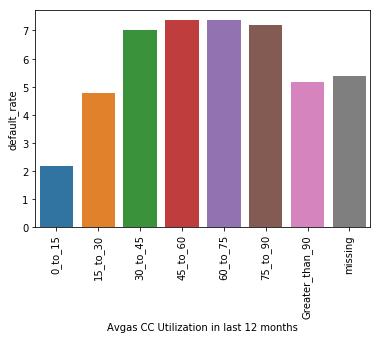

In [60]:
plot_agg_df('Avgas CC Utilization in last 12 months',agg_df)

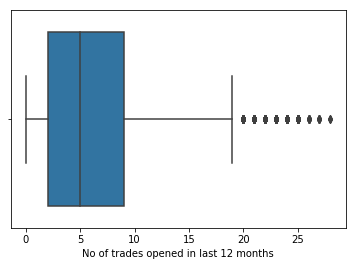

In [61]:
sns.boxplot(x='No of trades opened in last 12 months', data=merge_df)
plt.show()

In [62]:
merge_df['No of trades opened in last 12 months'][merge_df['No of trades opened in last 12 months']>18] =18

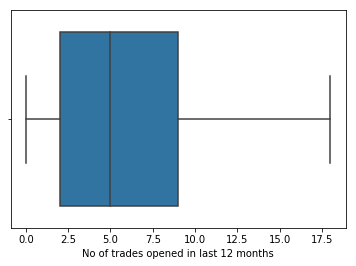

In [63]:
sns.boxplot(x='No of trades opened in last 12 months', data=merge_df)
plt.show()

In [64]:
agg_df=continuous_binning_eda(merge_df,'No of trades opened in last 12 months','Performance Tag_cred',2)
agg_df.head(15)

,No of trades opened in last 12 months_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 2.0]",456.0,25186,1.81
1,"(2.0, 4.0]",406.0,9499,4.27
2,"(4.0, 6.0]",498.0,8726,5.71
3,"(6.0, 8.0]",572.0,7868,7.27
4,"(8.0, 10.0]",412.0,6174,6.67
5,"(10.0, 12.0]",250.0,3871,6.46
6,"(12.0, 14.0]",124.0,2480,5.00
7,"(14.0, 16.0]",86.0,2057,4.18
8,"(16.0, 18.0]",127.0,3415,3.72


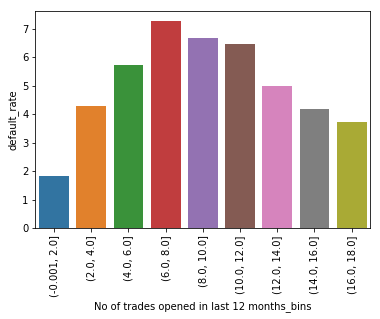

In [65]:
plot_agg_df('No of trades opened in last 12 months_bins',agg_df)

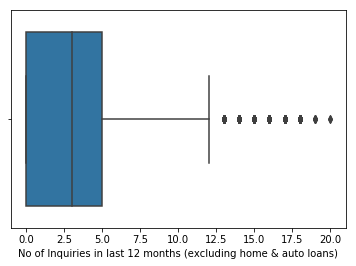

In [66]:
sns.boxplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', data=merge_df)
plt.show()

In [67]:
merge_df['No of Inquiries in last 12 months (excluding home & auto loans)'][merge_df['No of Inquiries in last 12 months (excluding home & auto loans)']>12] =12

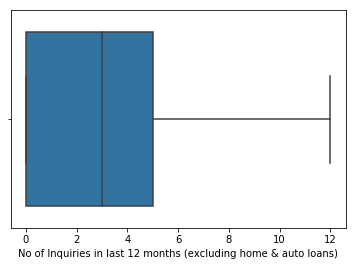

In [68]:
sns.boxplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', data=merge_df)
plt.show()

In [69]:
agg_df=continuous_binning_eda(merge_df,'No of Inquiries in last 12 months (excluding home & auto loans)','Performance Tag_cred',2)
agg_df.head(15)

,No of Inquiries in last 12 months (excluding home & auto loans)_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 2.0]",833.0,31915,2.61
1,"(2.0, 4.0]",822.0,16027,5.13
2,"(4.0, 6.0]",606.0,8514,7.12
3,"(6.0, 8.0]",350.0,5320,6.58
4,"(8.0, 10.0]",154.0,3284,4.69
5,"(10.0, 12.0]",166.0,4216,3.94


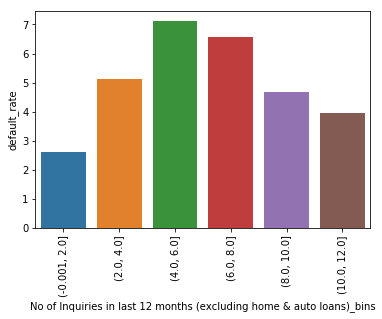

In [70]:
plot_agg_df('No of Inquiries in last 12 months (excluding home & auto loans)_bins',agg_df)

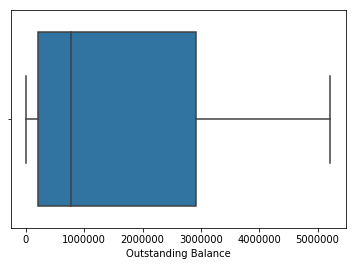

In [71]:
sns.boxplot(x='Outstanding Balance', data=merge_df)
plt.show()

In [72]:
agg_df=continuous_binning_eda(merge_df,'Outstanding Balance','Performance Tag_cred',100000)
agg_df.head(53)

,Outstanding Balance_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 100000.0]",280.0,14611,1.92
1,"(100000.0, 200000.0]",41.0,1509,2.72
2,"(200000.0, 300000.0]",130.0,3443,3.78
3,"(300000.0, 400000.0]",111.0,2199,5.05
4,"(400000.0, 500000.0]",184.0,3280,5.61
5,"(500000.0, 600000.0]",210.0,3823,5.49
6,"(600000.0, 700000.0]",198.0,3244,6.10
7,"(700000.0, 800000.0]",301.0,4492,6.70
8,"(800000.0, 900000.0]",172.0,2449,7.02
9,"(900000.0, 1000000.0]",219.0,4002,5.47


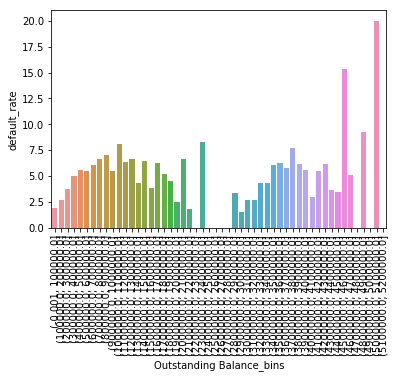

In [73]:
plot_agg_df('Outstanding Balance_bins',agg_df)

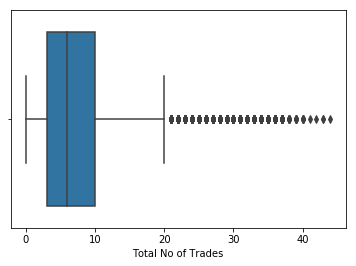

In [74]:
sns.boxplot(x='Total No of Trades', data=merge_df)
plt.show()

In [75]:
merge_df['Total No of Trades'][merge_df['Total No of Trades']>20] =20

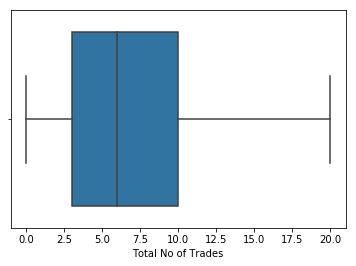

In [76]:
sns.boxplot(x='Total No of Trades', data=merge_df)
plt.show()

In [77]:
agg_df=continuous_binning_eda(merge_df,'Total No of Trades','Performance Tag_cred',2)
agg_df.head(15)

,Total No of Trades_bins,count_defaults,No_of_prospects,default_rate
0,"(-0.001, 2.0]",182.0,10321,1.76
1,"(2.0, 4.0]",388.0,15994,2.43
2,"(4.0, 6.0]",467.0,10641,4.39
3,"(6.0, 8.0]",564.0,9331,6.04
4,"(8.0, 10.0]",502.0,7117,7.05
5,"(10.0, 12.0]",304.0,4316,7.04
6,"(12.0, 14.0]",144.0,1857,7.75
7,"(14.0, 16.0]",45.0,904,4.98
8,"(16.0, 18.0]",25.0,836,2.99
9,"(18.0, 20.0]",310.0,7959,3.89


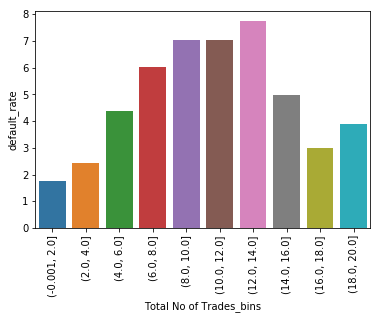

In [78]:
plot_agg_df('Total No of Trades_bins',agg_df)

In [79]:
merge_df['No of PL trades opened in last 12 months'].value_counts()

0     25356
3      8408
4      8244
2      6966
1      6675
5      6471
6      4194
7      2280
8      1177
9       599
10      253
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64

In [80]:
agg_df=categorical_eda(merge_df,'No of PL trades opened in last 12 months','Performance Tag_cred')
agg_df.head(10)

,No of PL trades opened in last 12 months,count_defaults,No_of_prospects,default_rate
0,0,446.0,25352,1.76
1,1,247.0,6623,3.73
2,2,366.0,6814,5.37
3,3,506.0,8106,6.24
4,4,534.0,7876,6.78
5,5,389.0,6176,6.30
6,6,242.0,4011,6.03
7,7,109.0,2219,4.91
8,8,50.0,1171,4.27
9,9,28.0,599,4.67


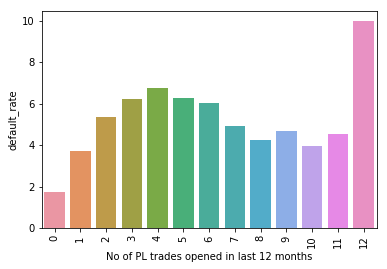

In [81]:
plot_agg_df('No of PL trades opened in last 12 months',agg_df)

In [82]:
merge_df['Presence of open home loan'].value_counts()

0.0    52601
1.0    18098
Name: Presence of open home loan, dtype: int64

In [83]:
agg_df=categorical_eda(merge_df,'Presence of open home loan','Performance Tag_cred')
agg_df.head(10)

,Presence of open home loan,count_defaults,No_of_prospects,default_rate
0,0.0,2325.0,51319,4.53
1,1.0,606.0,17957,3.37


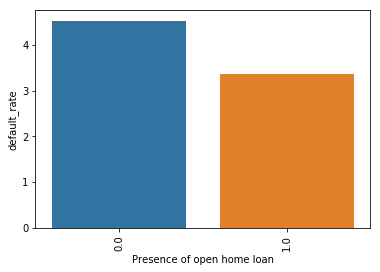

In [84]:
plot_agg_df('Presence of open home loan',agg_df)

In [85]:
merge_df['Presence of open auto loan'].value_counts()

0    64704
1     5995
Name: Presence of open auto loan, dtype: int64

In [86]:
agg_df=categorical_eda(merge_df,'Presence of open auto loan','Performance Tag_cred')
agg_df.head(10)

,Presence of open auto loan,count_defaults,No_of_prospects,default_rate
0,0,2712.0,63383,4.28
1,1,219.0,5893,3.72


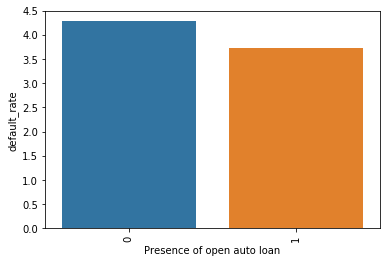

In [87]:
plot_agg_df('Presence of open auto loan',agg_df)

We have explored the effect of credit bureau data on the default in above plots and we can infer some facts that
- Person not having home and auto loan is more likely to default
- Person having greater than equal to 12 trades in last 12 months are more likely to default.
- Person having total trades between 8-14 are at high risk of default.
- People with high salary are more prone to default.
- People who have made 4-8 enquiries can default.

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [88]:
col_list=[ x for x in merge_df.columns if '_bins' not in x]
col_list

['Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession ',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan',
 'Performance Tag_c

In [89]:
merge_df=merge_df[col_list]
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70699 entries, 0 to 70698
Data columns (total 28 columns):
Age                                                                70699 non-null int64
Gender                                                             70699 non-null object
Marital Status (at the time of application)                        70699 non-null object
No of dependents                                                   70699 non-null float64
Income                                                             70699 non-null float64
Education                                                          70699 non-null object
Profession                                                         70699 non-null object
Type of residence                                                  70699 non-null object
No of months in current residence                                  70699 non-null int64
No of months in current company                                    70699 non-null int64
No

##### Function to calculate the IV values and get the WOE replaced datframe . We will create bins for the variables for which have more than 10 unique values.

In [90]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [91]:
iv_df,woe_df=iv_woe(merge_df,"Performance Tag_cred")

Information value of Age is 0.004483
Information value of Gender is 0.000367
Information value of Marital Status (at the time of application) is 9.5e-05
Information value of No of dependents is 0.002727
Information value of Income is 0.043249
Information value of Education is 0.000763
Information value of Profession  is 0.002029
Information value of Type of residence is 0.000944
Information value of No of months in current residence is 0.066412
Information value of No of months in current company is 0.022894
Information value of No of times 90 DPD or worse in last 6 months is 0.162574
Information value of No of times 60 DPD or worse in last 6 months is 0.211601
Information value of No of times 30 DPD or worse in last 6 months is 0.24496
Information value of No of times 90 DPD or worse in last 12 months is 0.215951
Information value of No of times 60 DPD or worse in last 12 months is 0.188085
Information value of No of times 30 DPD or worse in last 12 months is 0.218636
Information valu

In [92]:
iv_df

,Variable,IV
0,Age,0.004483
0,Gender,0.000367
0,Marital Status (at the time of application),0.000095
0,No of dependents,0.002727
0,Income,0.043249
0,Education,0.000763
0,Profession,0.002029
0,Type of residence,0.000944
0,No of months in current residence,0.066412
0,No of months in current company,0.022894


#### From above IV values the most impotant variables for Response model based on below convention are below.
- Information Value 	Variable Predictiveness
- Less than 0.02 	Not useful for prediction
- 0.02 to 0.1 	Weak predictive Power
- 0.1 to 0.3 	Medium predictive Power
- 0.3 to 0.5 	Strong predictive Power
- greater than 0.5 	Suspicious Predictive Power

#### Impotant predictors
- Avgas CC Utilization in last 12 months
- No of trades opened in last 12 months
- No of PL trades opened in last 12 months
- Outstanding Balance
- No of Inquiries in last 12 months (excluding home and auto loan)
- No of times 30 DPD or worse in last 6 months

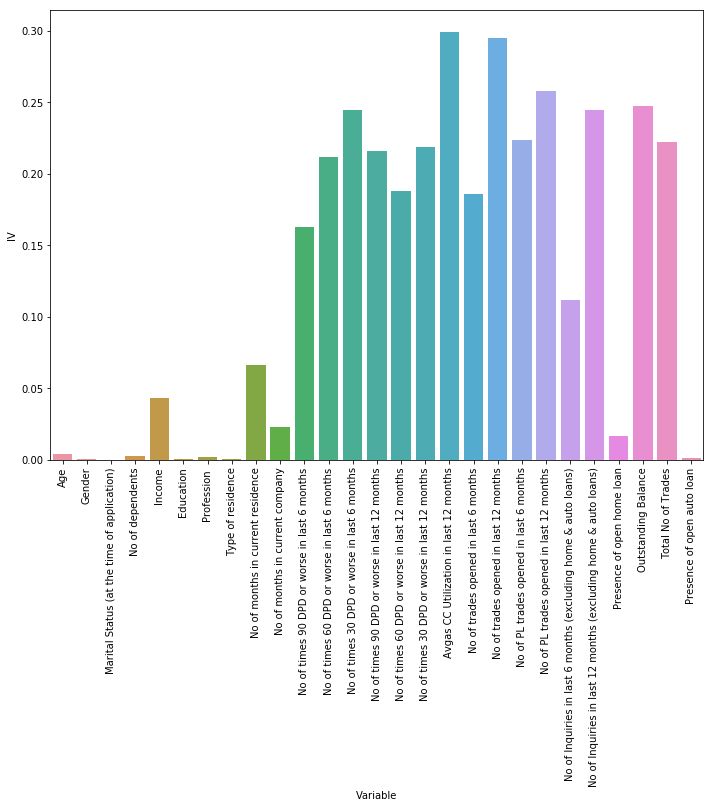

In [93]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='Variable', y='IV', data=iv_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [94]:
pd.set_option('display.max_rows', 500)
woe_df

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.999, 31.0]",7139,300.0,0.102354,6839.0,0.103082,-0.007090,5.162830e-06
1,Age,"(31.0, 36.0]",7789,340.0,0.116001,7449.0,0.112277,0.032635,1.215543e-04
2,Age,"(36.0, 39.0]",7098,319.0,0.108837,6779.0,0.102178,0.063131,4.203617e-04
3,Age,"(39.0, 42.0]",6939,308.0,0.105084,6631.0,0.099947,0.050114,2.574008e-04
4,Age,"(42.0, 45.0]",6824,274.0,0.093483,6550.0,0.098726,-0.054567,2.860920e-04
5,Age,"(45.0, 48.0]",6822,299.0,0.102013,6523.0,0.098319,0.036879,1.362140e-04
6,Age,"(48.0, 51.0]",6744,267.0,0.091095,6477.0,0.097626,-0.069239,4.521921e-04
7,Age,"(51.0, 54.0]",6745,245.0,0.083589,6500.0,0.097973,-0.158775,2.283733e-03
8,Age,"(54.0, 58.0]",6366,289.0,0.098601,6077.0,0.091597,0.073685,5.161048e-04
9,Age,"(58.0, 65.0]",6810,290.0,0.098942,6520.0,0.098274,0.006776,4.527508e-06


In [95]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 1
Data columns (total 9 columns):
Variable           173 non-null object
Cutoff             173 non-null object
N                  173 non-null int64
Events             173 non-null float64
% of Events        173 non-null float64
Non-Events         173 non-null float64
% of Non-Events    173 non-null float64
WoE                173 non-null float64
IV                 173 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.5+ KB


#### Apply WOE values to your dataframe columns

In [96]:
transform_vars_list=merge_df.columns.difference(['Performance Tag_cred'])

In [97]:

transform_vars_dict = dict(zip( merge_df.columns, merge_df.dtypes))
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [98]:
del transform_vars_dict['Performance Tag_cred']
transform_vars_dict


{'Age': dtype('int64'),
 'Gender': dtype('O'),
 'Marital Status (at the time of application)': dtype('O'),
 'No of dependents': dtype('float64'),
 'Income': dtype('float64'),
 'Education': dtype('O'),
 'Profession ': dtype('O'),
 'Type of residence': dtype('O'),
 'No of months in current residence': dtype('int64'),
 'No of months in current company': dtype('int64'),
 'No of times 90 DPD or worse in last 6 months': dtype('int64'),
 'No of times 60 DPD or worse in last 6 months': dtype('int64'),
 'No of times 30 DPD or worse in last 6 months': dtype('int64'),
 'No of times 90 DPD or worse in last 12 months': dtype('int64'),
 'No of times 60 DPD or worse in last 12 months': dtype('int64'),
 'No of times 30 DPD or worse in last 12 months': dtype('int64'),
 'Avgas CC Utilization in last 12 months': dtype('O'),
 'No of trades opened in last 6 months': dtype('float64'),
 'No of trades opened in last 12 months': dtype('int64'),
 'No of PL trades opened in last 6 months': dtype('int64'),
 'No o

In [99]:
for x in transform_vars_dict.items():
    print(x[0]+' and '+str(x[1]))
    

Age and int64
Gender and object
Marital Status (at the time of application) and object
No of dependents and float64
Income and float64
Education and object
Profession  and object
Type of residence and object
No of months in current residence and int64
No of months in current company and int64
No of times 90 DPD or worse in last 6 months and int64
No of times 60 DPD or worse in last 6 months and int64
No of times 30 DPD or worse in last 6 months and int64
No of times 90 DPD or worse in last 12 months and int64
No of times 60 DPD or worse in last 12 months and int64
No of times 30 DPD or worse in last 12 months and int64
Avgas CC Utilization in last 12 months and object
No of trades opened in last 6 months and float64
No of trades opened in last 12 months and int64
No of PL trades opened in last 6 months and int64
No of PL trades opened in last 12 months and int64
No of Inquiries in last 6 months (excluding home & auto loans) and int64
No of Inquiries in last 12 months (excluding home & 

In [100]:
def get_woe_data(rec,filt_df):
    final_val=0.0
    for index,row in filt_df.iterrows():
        if("(" in str(row.Cutoff)):
            arr=str(row.Cutoff)[1:-1].split(",")
            if(rec>float(arr[0]) and rec<=float(arr[1])):
                final_val=row.WoE
        else:
            if(rec==row.Cutoff):
                final_val=row.WoE
    return final_val
    

In [101]:
def get_woe_data1(rec,filt_df):
    final_val=0.0
    for row in filt_df.itertuples(index=True, name='Pandas'):
        if("(" in str(getattr(row,"Cutoff"))):
            arr=str(getattr(row,"Cutoff"))[1:-1].split(",")
            print(arr)
            if(rec>float(arr[0]) and rec<=float(arr[1])):
                final_val=getattr(row,"WoE")
                print(final_val)
        else:
            if(rec==getattr(row,"Cutoff")):
                final_val=getattr(row,"WoE")
    return final_val

In [102]:
def get_woe_data2(rec,filt_df):
    final_val=0.0
    if(type(rec)==int or type(rec)==float):
        filt_df['min_val']=filt_df['min_val'].astype(float)
        filt_df['max_val']=filt_df['max_val'].astype(float)
        filt_df=filt_df[(filt_df.min_val<rec) & (filt_df.max_val>=rec)]
        final_val = filt_df.iloc[0]['WoE']
    else:
        filt_df=filt_df[filt_df.min_val==rec]
        final_val = filt_df.iloc[0]['WoE']
    return final_val

In [103]:
def get_woe_data3(rec,filt_df):
    #if(type(rec)==int or type(rec)==float):
        #filt_df['min_val']=filt_df['min_val'].astype(float)
        #filt_df['max_val']=filt_df['max_val'].astype(float)
    val_dict = dict(zip(filt_df.max_val,filt_df.WoE))
    int_cmd = ''
    str_cmd = ''
    for x in sorted(val_dict.items()):
        int_cmd = int_cmd + str(x[1]) + str(' if y <= ') + str(x[0]) + ' else '
        str_cmd = str_cmd + str(x[1]) + str(' if y == "') + str(x[0]) + '" else '
    int_cmd = int_cmd + '0'
    str_cmd = str_cmd + '0'
    if(type(rec)==int or type(rec)==float):
        return int_cmd
    else:
        return str_cmd
    

In [104]:
# Unit testing of approach and transformation
small_df = woe_df[woe_df['Variable'] == 'Outstanding Balance']
small_df['min_val']=small_df['Cutoff'].apply(lambda x: str(x)[1:-1].split(",")[0] if("(" in str(x)) else str(x))
small_df['max_val']=small_df['Cutoff'].apply(lambda x: str(x)[1:-1].split(",")[1] if("(" in str(x)) else str(x))
small_df['min_val']=small_df['min_val'].astype(float)
small_df['max_val']=small_df['max_val'].astype(float)
val_dict = dict(zip(small_df.max_val,small_df.WoE))
for x in sorted(val_dict.items()):
    print(x)

(7053.8, -0.7608127295030535)
(30804.0, -0.9223754503111184)
(391256.0, -0.11045897626240088)
(588296.8, 0.26761343594290155)
(774992.0, 0.45672551708902237)
(970583.4, 0.43790090491951517)
(1350701.2, 0.39706529410559654)
(2959558.0, -0.3344232087880399)
(3276997.0, -0.8590696044554942)
(5218801.0, 0.2974779505535542)


In [105]:
for var in transform_vars_dict.items():
    small_df = woe_df[woe_df['Variable'] == var[0]]
    small_df['min_val']=small_df['Cutoff'].apply(lambda x: str(x)[1:-1].split(",")[0] if("(" in str(x)) else str(x))
    small_df['max_val']=small_df['Cutoff'].apply(lambda x: str(x)[1:-1].split(",")[1] if("(" in str(x)) else str(x))
    if(str(var[1]) in ['int64','float64']):
        small_df['min_val']=small_df['min_val'].astype(float)
        small_df['max_val']=small_df['max_val'].astype(float)
    #merge_df[transform_prefix + var] = merge_df[var].apply(lambda x: get_woe_data2(x,small_df))
    merge_df[transform_prefix + var[0]] = merge_df[var[0]].apply(lambda y: eval(get_woe_data3(y,small_df)))

In [106]:
#merge_df['Education'].value_counts()
x=merge_df[['Outstanding Balance','new_Outstanding Balance']]
x

,Outstanding Balance,new_Outstanding Balance
0,2999395.0,-0.859070
1,3078.0,-0.760813
2,3004972.0,-0.859070
3,3355373.0,0.297478
4,3014283.0,-0.859070
5,3005535.0,-0.859070
6,3004790.0,-0.859070
7,3007428.0,-0.859070
8,170860.0,-0.110459
9,1650.0,-0.760813


In [107]:
#merge_df['new_Education'].value_counts()
merge_df['new_Income'].value_counts()

 0.011032    8206
 0.362294    7958
-0.169838    7407
 0.084417    6897
-0.150090    6866
 0.038292    6864
 0.138922    6726
 0.095736    6713
-0.273975    6611
-0.385535    6451
Name: new_Income, dtype: int64

In [108]:
woe_columns_list=[x for x in merge_df.columns if ("new_" in x or x=='Performance Tag_cred')]
woe_columns_list

['Performance Tag_cred',
 'new_Age',
 'new_Gender',
 'new_Marital Status (at the time of application)',
 'new_No of dependents',
 'new_Income',
 'new_Education',
 'new_Profession ',
 'new_Type of residence',
 'new_No of months in current residence',
 'new_No of months in current company',
 'new_No of times 90 DPD or worse in last 6 months',
 'new_No of times 60 DPD or worse in last 6 months',
 'new_No of times 30 DPD or worse in last 6 months',
 'new_No of times 90 DPD or worse in last 12 months',
 'new_No of times 60 DPD or worse in last 12 months',
 'new_No of times 30 DPD or worse in last 12 months',
 'new_Avgas CC Utilization in last 12 months',
 'new_No of trades opened in last 6 months',
 'new_No of trades opened in last 12 months',
 'new_No of PL trades opened in last 6 months',
 'new_No of PL trades opened in last 12 months',
 'new_No of Inquiries in last 6 months (excluding home & auto loans)',
 'new_No of Inquiries in last 12 months (excluding home & auto loans)',
 'new_Prese

In [109]:
woe_data_df=merge_df[woe_columns_list]
woe_data_df.head()

,Performance Tag_cred,new_Age,new_Gender,new_Marital Status (at the time of application),new_No of dependents,new_Income,new_Education,new_Profession,new_Type of residence,new_No of months in current residence,...,new_No of trades opened in last 6 months,new_No of trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of PL trades opened in last 12 months,new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of Inquiries in last 12 months (excluding home & auto loans),new_Presence of open home loan,new_Outstanding Balance,new_Total No of Trades,new_Presence of open auto loan
0,0.0,0.036879,0.034085,-0.004073,-0.082764,-0.273975,0.014780,-0.026442,-0.00307,-0.065038,...,-0.544714,-0.811640,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,-0.859070,-0.444289,0.011745
1,0.0,-0.007090,-0.010774,-0.004073,-0.029016,-0.385535,-0.016444,-0.014415,-0.00307,-0.065038,...,-0.544714,-0.811640,-0.652467,-0.690243,-0.31849,-0.833331,0.071547,-0.760813,-0.047234,0.011745
2,0.0,0.032635,-0.010774,0.023251,-0.082764,-0.169838,0.014780,-0.014415,-0.00307,-0.065038,...,-0.544714,-0.911591,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,-0.859070,-0.900613,0.011745
3,0.0,-0.054567,-0.010774,-0.004073,0.044443,-0.385535,0.014780,0.087433,-0.00307,0.127465,...,-0.544714,-0.911591,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,0.297478,-0.444289,-0.135053
4,0.0,0.032635,0.034085,-0.004073,-0.003115,-0.169838,-0.016444,-0.026442,-0.00307,-0.065038,...,-0.544714,-0.911591,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,-0.859070,-0.444289,0.011745


In [110]:
final_col_list=['Performance Tag']
for x in transform_vars_dict.items():
    final_col_list.append(x[0])
final_col_list

['Performance Tag',
 'Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession ',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

In [111]:
woe_data_df.columns = [x for x in final_col_list]
woe_data_df.head()

,Performance Tag,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.0,0.036879,0.034085,-0.004073,-0.082764,-0.273975,0.014780,-0.026442,-0.00307,-0.065038,...,-0.544714,-0.811640,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,-0.859070,-0.444289,0.011745
1,0.0,-0.007090,-0.010774,-0.004073,-0.029016,-0.385535,-0.016444,-0.014415,-0.00307,-0.065038,...,-0.544714,-0.811640,-0.652467,-0.690243,-0.31849,-0.833331,0.071547,-0.760813,-0.047234,0.011745
2,0.0,0.032635,-0.010774,0.023251,-0.082764,-0.169838,0.014780,-0.014415,-0.00307,-0.065038,...,-0.544714,-0.911591,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,-0.859070,-0.900613,0.011745
3,0.0,-0.054567,-0.010774,-0.004073,0.044443,-0.385535,0.014780,0.087433,-0.00307,0.127465,...,-0.544714,-0.911591,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,0.297478,-0.444289,-0.135053
4,0.0,0.032635,0.034085,-0.004073,-0.003115,-0.169838,-0.016444,-0.026442,-0.00307,-0.065038,...,-0.544714,-0.911591,-0.652467,-0.690243,-0.31849,-0.833331,-0.235001,-0.859070,-0.444289,0.011745


In [112]:
woe_data_df.to_csv('woe_data.csv', sep=',', encoding='utf-8',index=False)

We have saved the woe transformed dataset into woe_data.csv file. Now we will check for correlations and start the model building part.

#### Checking Corelations

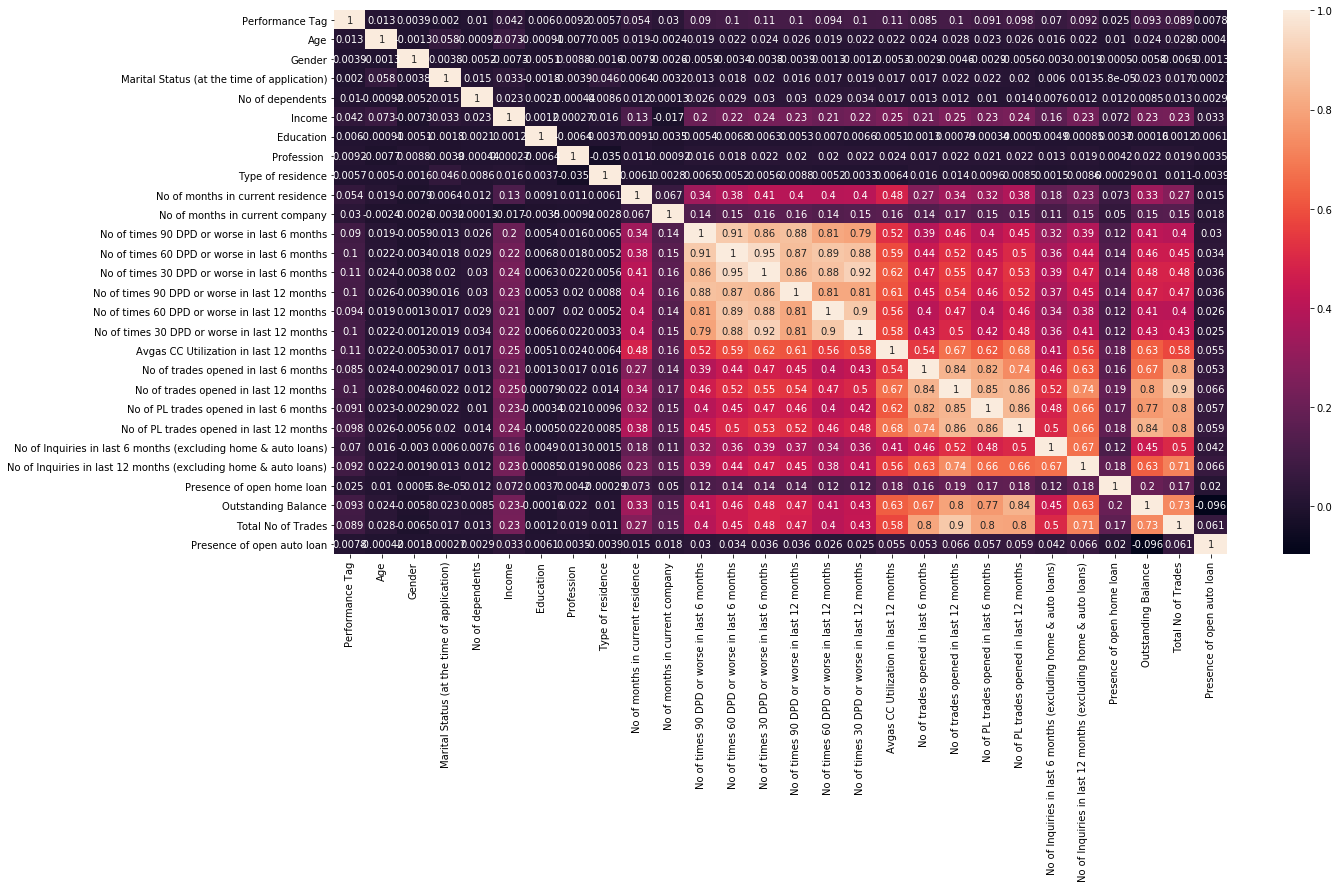

In [113]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(woe_data_df.corr(),annot = True)
plt.show()

### We can see some of the variables are highly correlated. We can remove the coreelated variables listed below.
- No of times 60 DPD or worse in last 6 months
- No of times 30 DPD or worse in last 6 months
- No of times 90 DPD or worse in last 12 months
- No of times 60 DPD or worse in last 12 months
- No of times 30 DPD or worse in last 12 months
- No of trades opened in last 12 months
- No of PL trades opened in last 6 months
- No of PL trades opened in last 12 months
- Total No of Trades

In [114]:
woe_data_df=woe_data_df[woe_data_df.columns.difference(['No of times 60 DPD or worse in last 6 months','No of times 30 DPD or worse in last 6 months',
                                                       'No of times 90 DPD or worse in last 12 months','No of times 60 DPD or worse in last 12 months',
                                                       'No of times 30 DPD or worse in last 12 months','No of trades opened in last 12 months',
                                                       'No of PL trades opened in last 6 months','No of PL trades opened in last 12 months',
                                                       'Total No of Trades'])]

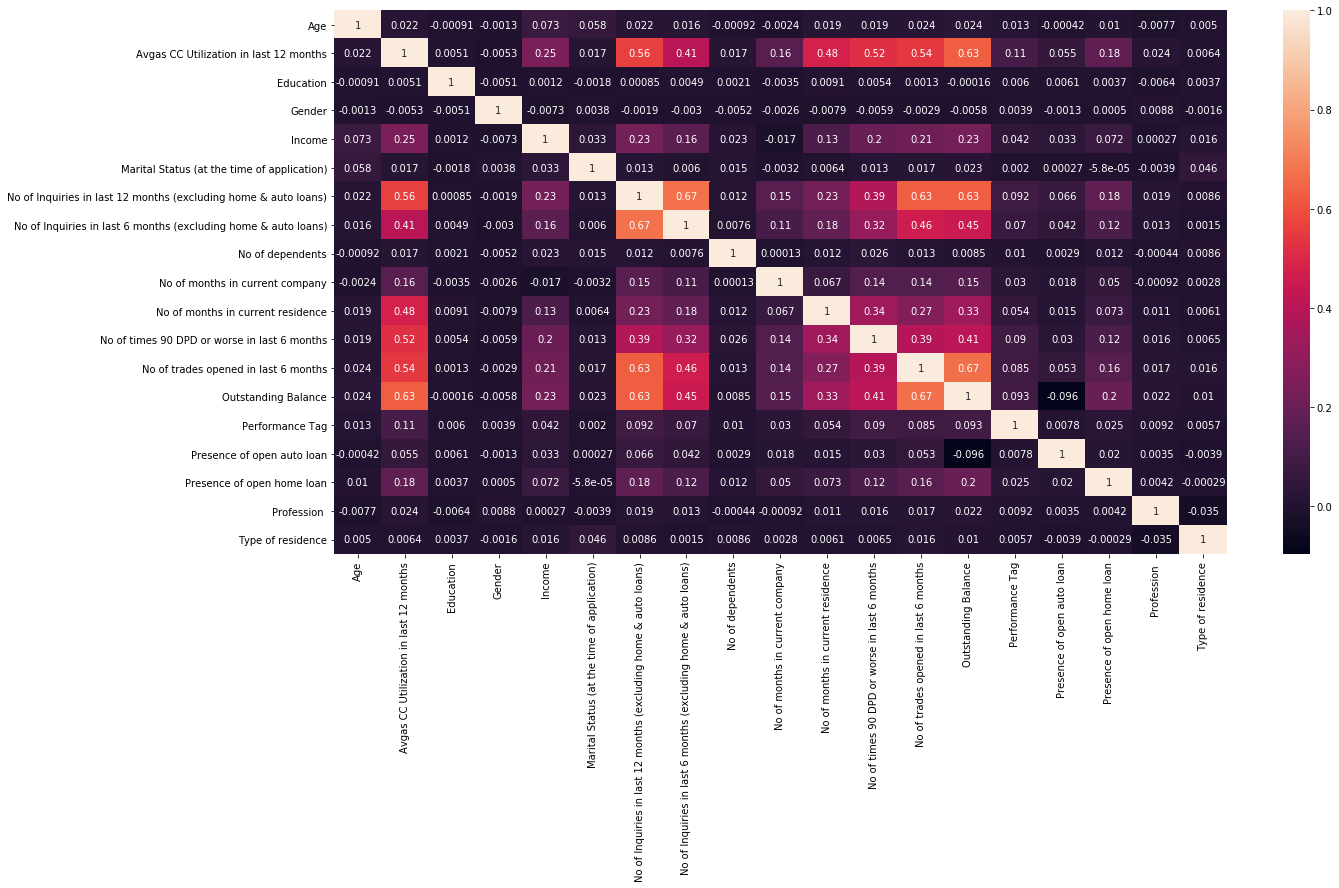

In [115]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(woe_data_df.corr(),annot = True)
plt.show()

In [116]:
woe_data_df.isnull().sum()

Age                                                                   0
Avgas CC Utilization in last 12 months                                0
Education                                                             0
Gender                                                                0
Income                                                                0
Marital Status (at the time of application)                           0
No of Inquiries in last 12 months (excluding home & auto loans)       0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of dependents                                                      0
No of months in current company                                       0
No of months in current residence                                     0
No of times 90 DPD or worse in last 6 months                          0
No of trades opened in last 6 months                                  0
Outstanding Balance                                             

#### Model building with demographic variables

In [117]:
# inspect the columns of demographic dataframe
demgrphc.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [118]:
demgrphc_woe_df=woe_data_df[demgrphc.columns.difference(['Application ID'])]

In [119]:
demgrphc_woe_df.head()

,Age,Education,Gender,Income,Marital Status (at the time of application),No of dependents,No of months in current company,No of months in current residence,Performance Tag,Profession,Type of residence
0,0.036879,0.014780,0.034085,-0.273975,-0.004073,-0.082764,-0.232160,-0.065038,0.0,-0.026442,-0.00307
1,-0.007090,-0.016444,-0.010774,-0.385535,-0.004073,-0.029016,-0.174575,-0.065038,0.0,-0.014415,-0.00307
2,0.032635,0.014780,-0.010774,-0.169838,0.023251,-0.082764,-0.207461,-0.065038,0.0,-0.014415,-0.00307
3,-0.054567,0.014780,-0.010774,-0.385535,-0.004073,0.044443,-0.207461,0.127465,0.0,0.087433,-0.00307
4,0.032635,-0.016444,0.034085,-0.169838,-0.004073,-0.003115,-0.174575,-0.065038,0.0,-0.026442,-0.00307


In [120]:
demgrphc_woe_df.isnull().sum()

Age                                               0
Education                                         0
Gender                                            0
Income                                            0
Marital Status (at the time of application)       0
No of dependents                                  0
No of months in current company                   0
No of months in current residence                 0
Performance Tag                                1423
Profession                                        0
Type of residence                                 0
dtype: int64

### We will filter the data where performance tag is null and use that for model evaulation if Credx was right in rejecting thse candidates. Also we will build the model without this data.

In [121]:
demgrphc_woe_df['Application ID']=app_id_df['Application ID']

In [122]:
reject_demgrphc_woe_df=demgrphc_woe_df[demgrphc_woe_df['Performance Tag'].isnull()]
reject_demgrphc_woe_df.shape

(1423, 12)

In [123]:
reject_demprphc_app_id_df=reject_demgrphc_woe_df[['Application ID']]

In [124]:
final_demgrphc_woe_df=demgrphc_woe_df[~demgrphc_woe_df['Performance Tag'].isnull()]
final_demgrphc_woe_df.shape

(69276, 12)

In [125]:
final_demgrphc_woe_df.isnull().sum()

Age                                            0
Education                                      0
Gender                                         0
Income                                         0
Marital Status (at the time of application)    0
No of dependents                               0
No of months in current company                0
No of months in current residence              0
Performance Tag                                0
Profession                                     0
Type of residence                              0
Application ID                                 0
dtype: int64

In [126]:
final_demgrphc_woe_df.head()

,Age,Education,Gender,Income,Marital Status (at the time of application),No of dependents,No of months in current company,No of months in current residence,Performance Tag,Profession,Type of residence,Application ID
0,0.036879,0.014780,0.034085,-0.273975,-0.004073,-0.082764,-0.232160,-0.065038,0.0,-0.026442,-0.00307,954457215
1,-0.007090,-0.016444,-0.010774,-0.385535,-0.004073,-0.029016,-0.174575,-0.065038,0.0,-0.014415,-0.00307,432830445
2,0.032635,0.014780,-0.010774,-0.169838,0.023251,-0.082764,-0.207461,-0.065038,0.0,-0.014415,-0.00307,941387308
3,-0.054567,0.014780,-0.010774,-0.385535,-0.004073,0.044443,-0.207461,0.127465,0.0,0.087433,-0.00307,392161677
4,0.032635,-0.016444,0.034085,-0.169838,-0.004073,-0.003115,-0.174575,-0.065038,0.0,-0.026442,-0.00307,182011211


##### Checking class imbalance

Text(0.5,1,'defults')

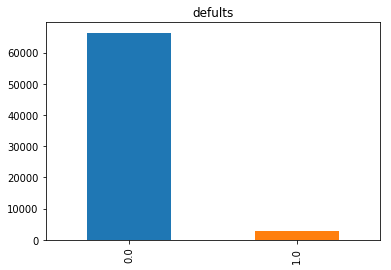

In [127]:
final_demgrphc_woe_df['Performance Tag'].value_counts().plot('bar').set_title('defults')

#### As we can see lot of class imbalance in the dataset , we will use SMOTE sampling to tackle the class imbalance

In [128]:
demgrphc_woe_app_id_df=final_demgrphc_woe_df[['Application ID']]

In [129]:
# Import library to split the dataset into test and train
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [130]:
# Putting feature variable to X
X = final_demgrphc_woe_df.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = final_demgrphc_woe_df['Performance Tag']

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
sm = SMOTE(random_state=100, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,1,'defalults')

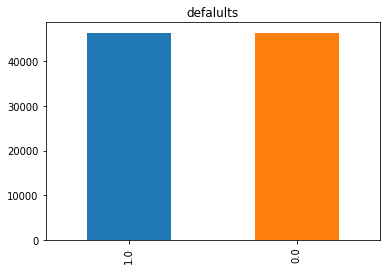

In [132]:
pd.DataFrame(y_train)[0].value_counts().plot('bar').set_title('defalults')

In [133]:
X_train=pd.DataFrame(X_train)
X_train.columns = [x for x in final_demgrphc_woe_df.columns if x != 'Performance Tag']

In [134]:
X_train_app_id=X_train[['Application ID']]

In [135]:
X_train.drop(['Application ID'],axis=1,inplace=True)

In [136]:
X_train.head()

,Age,Education,Gender,Income,Marital Status (at the time of application),No of dependents,No of months in current company,No of months in current residence,Profession,Type of residence
0,-0.158775,-0.016444,-0.010774,-0.169838,-0.004073,-0.003115,-0.174575,0.469564,0.087433,-0.003070
1,-0.007090,0.007620,-0.010774,0.084417,-0.004073,-0.082764,0.184180,-0.242749,-0.014415,0.083371
2,0.050114,-0.016444,-0.010774,0.011032,0.023251,-0.082764,-0.068110,-0.242749,-0.026442,-0.003070
3,-0.054567,0.007620,-0.010774,-0.273975,-0.004073,-0.082764,-0.207461,-0.242749,-0.026442,-0.003070
4,-0.069239,-0.016444,0.034085,0.138922,-0.004073,-0.029016,0.100899,0.292523,-0.026442,-0.003070


In [137]:
X_test_app_id=X_test[['Application ID']]

In [138]:
X_test.drop(['Application ID'],axis=1,inplace=True)

In [139]:
X_test.head()

,Age,Education,Gender,Income,Marital Status (at the time of application),No of dependents,No of months in current company,No of months in current residence,Profession,Type of residence
19817,0.073685,-0.016444,0.034085,-0.273975,-0.004073,-0.003115,-0.174575,-0.242749,0.087433,-0.003070
20143,0.063131,-0.016444,-0.010774,0.011032,-0.004073,-0.082764,0.184180,-0.242749,0.087433,-0.003070
59226,0.063131,0.014780,-0.010774,0.011032,-0.004073,0.055850,0.184180,-0.242749,-0.014415,-0.003070
33354,0.032635,0.014780,-0.010774,0.084417,0.023251,0.044443,0.100899,-0.242749,0.087433,0.083371
38113,0.036879,0.007620,-0.010774,-0.150090,-0.004073,0.044443,-0.207461,0.137619,-0.014415,-0.003070


In [140]:
import statsmodels.api as sm

### Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at Logistic Regression for this problem


#### Logistic Regression

In [141]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [142]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92781
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62561.
Date:                Sat, 21 Dec 2019   Deviance:                   1.2512e+05
Time:                        20:45:57   Pearson chi2:                 9.28e+04
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.0008      0.007      0.116      0.907      -0.012       0.014
Age                                             1.0432      0.109      9.529      0.000       0.829       1.258
Education                                       1.8553      0.268      6.922      0.000       1.330       2.381
Gender                                          1.7140      0.381      4.495      0.000       0.967       2.461
Income                                          1.0205      0.036     28.464      0.000       0.950       1.091
Marital Status (at the time of application)    -2.3632      0.757     -3.121      0.002      -3.847      -0.879
No of dependents                                0.8949      0.139      6.417      0.000       0.622       1.168
No of months in current company                 1.2473      0.049     25.622      0.000       1.152       1.343
No of months in current residence               1.0043      0.029     34.910      0.000       0.948       1.061
Profession                                      1.1483      0.163      7.038      0.000       0.829       1.468
Type of residence                               1.0171      0.233      4.367      0.000       0.561       1.474
===============================================================================================================
"""

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [145]:

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [
         ("logistic", logistic)
        ]

# compile pipeline
dem_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=dem_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [146]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [147]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6127792540766556
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2'}


In [148]:
# predict default on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[11641  8308]
 [  363   471]]
Sensitivity: 	0.56
Specificity: 	0.58
AUC:    	 0.6


In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.58      0.73     19949
        1.0       0.05      0.56      0.10       834

avg / total       0.93      0.58      0.70     20783



In [151]:
from sklearn import metrics
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test, y_pred))

0.5827840061588798


In [152]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [153]:
# Getting the predicted values on the train set
y_train_pred  = model.predict_proba(X_train)[:, 1]
y_train_pred[:10]

array([0.49315474, 0.51482304, 0.38953072, 0.28134835, 0.61333184,
       0.63816395, 0.72953028, 0.65153636, 0.53109202, 0.63860189])

In [154]:
y_train_pred.shape

(92792,)

In [155]:
X_train_app_id.isnull().sum()

Application ID    0
dtype: int64

In [156]:
y_train_pred_final = pd.DataFrame({'Default':pd.DataFrame(y_train)[0], 'Default_Prob':y_train_pred,'Application_id':X_train_app_id['Application ID']})


In [157]:
y_train_pred_final.shape

(92792, 3)

In [158]:
#y_train_pred_final['Application ID'] = X_train_app_id['Application ID']
y_train_pred_final.sort_values(by='Default_Prob', ascending=False)

,Default,Default_Prob,Application_id
19804,0.0,0.857741,7.010466e+08
38086,0.0,0.856558,6.748420e+08
40542,0.0,0.855675,7.978974e+08
19671,1.0,0.850996,7.169380e+08
6373,1.0,0.835155,1.856801e+08
53080,1.0,0.834410,7.170543e+08
69309,1.0,0.833641,1.856873e+08
49694,1.0,0.833442,1.856883e+08
29459,0.0,0.829990,1.970580e+08
23126,0.0,0.829640,2.131085e+08


In [159]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Default,Default_Prob,Application_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.493155,736740144.0,1,1,1,1,1,0,0,0,0,0
1,0.0,0.514823,843972895.0,1,1,1,1,1,1,0,0,0,0
2,0.0,0.389531,756792783.0,1,1,1,1,0,0,0,0,0,0
3,0.0,0.281348,445674876.0,1,1,1,0,0,0,0,0,0,0
4,0.0,0.613332,354601724.0,1,1,1,1,1,1,1,0,0,0


In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.500032  1.000000  0.000065
0.3   0.3  0.509764  0.997392  0.022136
0.4   0.4  0.571105  0.910510  0.231701
0.5   0.5  0.580707  0.570243  0.591172
0.6   0.6  0.523989  0.190426  0.857552
0.7   0.7  0.500032  0.014225  0.985839
0.8   0.8  0.500172  0.000539  0.999806
0.9   0.9  0.500000  0.000000  1.000000


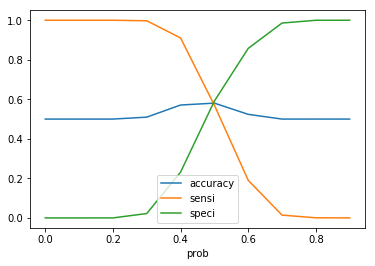

In [161]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.5 is the optimum point to take it as a cutoff probability


In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Application_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.493155,736740144.0,1,1,1,1,1,0,0,0,0,0,0
1,0.0,0.514823,843972895.0,1,1,1,1,1,1,0,0,0,0,1
2,0.0,0.389531,756792783.0,1,1,1,1,0,0,0,0,0,0,0
3,0.0,0.281348,445674876.0,1,1,1,0,0,0,0,0,0,0,0
4,0.0,0.613332,354601724.0,1,1,1,1,1,1,1,0,0,0,1


In [163]:
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.58070738856798

In [164]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted )
confusion2

array([[27428, 18968],
       [19939, 26457]], dtype=int64)

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.5702431244072765

In [167]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5911716527286835

In [168]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

0.4088283472713165

In [169]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.5824325811777655

In [170]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.5790529271433699

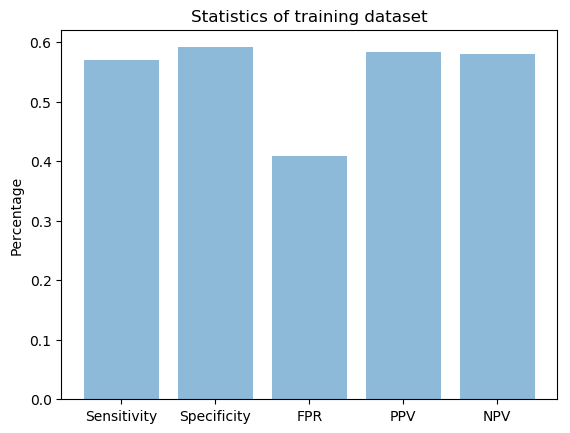

In [171]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of training dataset')

plt.show()

In [172]:
y_test_pred_final = pd.DataFrame({'Default':y_test.values, 'Default_Prob':y_pred_prob,'Application_id':X_test_app_id['Application ID']})
y_test_pred_final.sort_values(by='Default_Prob', ascending=False)

,Default,Default_Prob,Application_id
69239,0.0,0.833803,154751851
67462,0.0,0.832390,687481252
66736,0.0,0.830426,855896131
67453,0.0,0.809767,88427538
66020,0.0,0.785187,924423440
58007,0.0,0.781971,698112084
67851,0.0,0.778893,543529268
65242,0.0,0.776851,941303118
68108,0.0,0.776405,402393403
52888,0.0,0.775028,835765439


### Testing on the test dataset with optimal cutoff probability

In [173]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_test_pred_final.head()

,Default,Default_Prob,Application_id,final_predicted
19817,0.0,0.367361,824730661,0
20143,0.0,0.511447,632618272,1
59226,0.0,0.526960,353210234,1
33354,0.0,0.548110,676919255,1
38113,0.0,0.447377,360989573,0


In [174]:
metrics.accuracy_score(y_test_pred_final.Default, y_test_pred_final.final_predicted)

0.5827840061588798

In [175]:
confusion = metrics.confusion_matrix(y_test_pred_final.Default, y_test_pred_final.final_predicted )
confusion

array([[11641,  8308],
       [  363,   471]], dtype=int64)

In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.564748201438849

In [178]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5835380219559878

In [179]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

0.41646197804401225

In [180]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.05365075748946349

In [181]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.9697600799733422

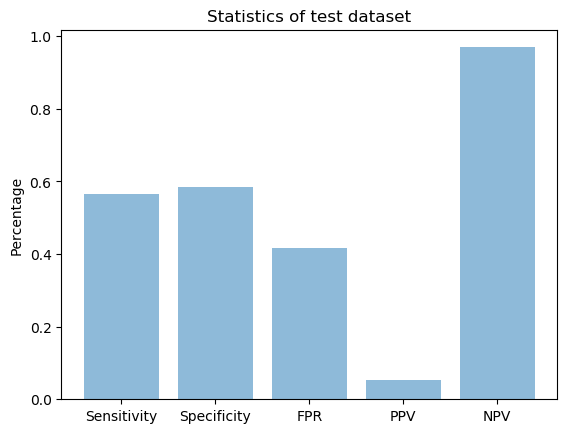

In [182]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of test dataset')

plt.show()

### Accessing the model for rejected population

In [183]:
# check area under curve
x=reject_demgrphc_woe_df.drop(['Application ID','Performance Tag'],axis=1)
pred_reject_prob = model.predict_proba(x)[:, 1]
len(pred_reject_prob)
#pred_reject_prob[2:5]
#Creating a dataframe of 1 as all rejected population will default as per bank.
d=np.ones(shape=(len(pred_reject_prob),))
#d.shape
#d = pd.DataFrame(1, index=np.arange(len(pred_reject_prob)), columns=['Default'])
#d.head()
#reject_pred_final = pd.DataFrame({'Default':d, 'Default_Prob':pred_reject_prob})
reject_pred_final = pd.DataFrame({'Default':d, 'Default_Prob':pred_reject_prob,'Application_id':reject_demprphc_app_id_df['Application ID']})
reject_pred_final.sort_values(by='Default_Prob', ascending=False)

,Default,Default_Prob,Application_id
70635,1.0,0.850030,416075975
69505,1.0,0.784598,312379276
69572,1.0,0.779700,161092234
69473,1.0,0.775723,730264175
70453,1.0,0.773075,22922672
69095,1.0,0.772023,924690782
70100,1.0,0.771503,473747285
70440,1.0,0.770721,518563176
69645,1.0,0.766438,476134280
70176,1.0,0.765240,411788640


In [184]:
reject_pred_final['final_predicted'] = reject_pred_final.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

reject_pred_final.head()

,Default,Default_Prob,Application_id,final_predicted
69010,1.0,0.750941,906908303,1
69011,1.0,0.552617,10990583,1
69012,1.0,0.489194,589678446,0
69013,1.0,0.424825,809411322,0
69014,1.0,0.398935,150246616,0


In [185]:
metrics.accuracy_score(reject_pred_final.Default, reject_pred_final.final_predicted)

0.7814476458186929

In [186]:
confusion = metrics.confusion_matrix(reject_pred_final.Default, reject_pred_final.final_predicted )
confusion

array([[   0,    0],
       [ 311, 1112]], dtype=int64)

In [187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.7814476458186929

In [189]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

nan

In [190]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

nan

In [191]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

1.0

In [192]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.0

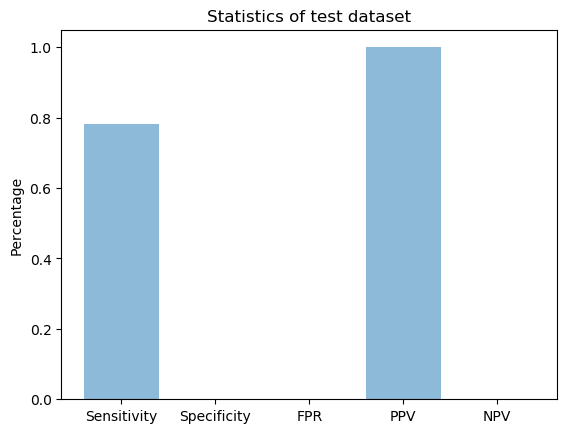

In [193]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of test dataset')

plt.show()

### When we apply demographic model on rejected population we can observe that it has accuracy and senstivity of 78 %

### Building the model with demographic and credit bureau data.

In [194]:
woe_data_df.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Performance Tag,Presence of open auto loan,Presence of open home loan,Profession,Type of residence
0,0.036879,-0.692587,0.014780,0.034085,-0.273975,-0.004073,-0.833331,-0.31849,-0.082764,-0.232160,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.026442,-0.00307
1,-0.007090,-0.692587,-0.016444,-0.010774,-0.385535,-0.004073,-0.833331,-0.31849,-0.029016,-0.174575,-0.065038,-0.261585,-0.544714,-0.760813,0.0,0.011745,0.071547,-0.014415,-0.00307
2,0.032635,-0.692587,0.014780,-0.010774,-0.169838,0.023251,-0.833331,-0.31849,-0.082764,-0.207461,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.014415,-0.00307
3,-0.054567,-0.692587,0.014780,-0.010774,-0.385535,-0.004073,-0.833331,-0.31849,0.044443,-0.207461,0.127465,-0.261585,-0.544714,0.297478,0.0,-0.135053,-0.235001,0.087433,-0.00307
4,0.032635,-0.692587,-0.016444,0.034085,-0.169838,-0.004073,-0.833331,-0.31849,-0.003115,-0.174575,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.026442,-0.00307


In [195]:
woe_data_df.isnull().sum()

Age                                                                   0
Avgas CC Utilization in last 12 months                                0
Education                                                             0
Gender                                                                0
Income                                                                0
Marital Status (at the time of application)                           0
No of Inquiries in last 12 months (excluding home & auto loans)       0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of dependents                                                      0
No of months in current company                                       0
No of months in current residence                                     0
No of times 90 DPD or worse in last 6 months                          0
No of trades opened in last 6 months                                  0
Outstanding Balance                                             

### We will filter the data where performance tag is null and use that for model evaulation if Credx was right in rejecting thse candidates. Also we will build the model without this data.

In [196]:
woe_data_df['Application ID']=app_id_df['Application ID']

In [197]:
reject_woe_df=woe_data_df[woe_data_df['Performance Tag'].isnull()]
reject_woe_df.shape

(1423, 20)

In [198]:
reject_app_id_df=reject_woe_df[['Application ID']]

In [199]:
final_woe_df=woe_data_df[~woe_data_df['Performance Tag'].isnull()]
final_woe_df.shape

(69276, 20)

In [200]:
final_woe_df.isnull().sum()

Age                                                                0
Avgas CC Utilization in last 12 months                             0
Education                                                          0
Gender                                                             0
Income                                                             0
Marital Status (at the time of application)                        0
No of Inquiries in last 12 months (excluding home & auto loans)    0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of dependents                                                   0
No of months in current company                                    0
No of months in current residence                                  0
No of times 90 DPD or worse in last 6 months                       0
No of trades opened in last 6 months                               0
Outstanding Balance                                                0
Performance Tag                   

In [201]:
final_woe_df.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Performance Tag,Presence of open auto loan,Presence of open home loan,Profession,Type of residence,Application ID
0,0.036879,-0.692587,0.014780,0.034085,-0.273975,-0.004073,-0.833331,-0.31849,-0.082764,-0.232160,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.026442,-0.00307,954457215
1,-0.007090,-0.692587,-0.016444,-0.010774,-0.385535,-0.004073,-0.833331,-0.31849,-0.029016,-0.174575,-0.065038,-0.261585,-0.544714,-0.760813,0.0,0.011745,0.071547,-0.014415,-0.00307,432830445
2,0.032635,-0.692587,0.014780,-0.010774,-0.169838,0.023251,-0.833331,-0.31849,-0.082764,-0.207461,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.014415,-0.00307,941387308
3,-0.054567,-0.692587,0.014780,-0.010774,-0.385535,-0.004073,-0.833331,-0.31849,0.044443,-0.207461,0.127465,-0.261585,-0.544714,0.297478,0.0,-0.135053,-0.235001,0.087433,-0.00307,392161677
4,0.032635,-0.692587,-0.016444,0.034085,-0.169838,-0.004073,-0.833331,-0.31849,-0.003115,-0.174575,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.026442,-0.00307,182011211


##### Checking class imbalance

Text(0.5,1,'defaults')

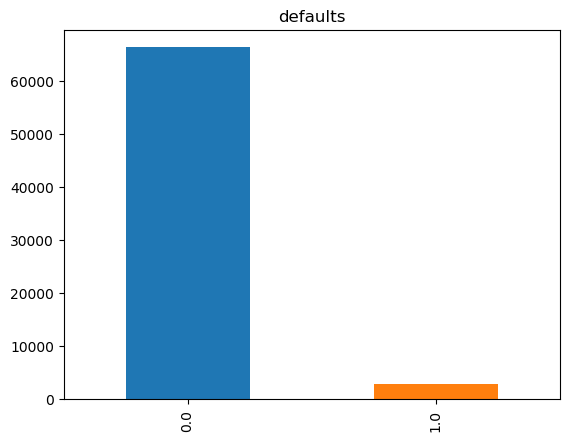

In [202]:
final_woe_df['Performance Tag'].value_counts().plot('bar').set_title('defaults')

#### As we can see lot of class imbalance in the dataset , we will use SMOTE sampling to tackle the class imbalance

In [203]:
woe_app_id_df=final_woe_df[['Application ID']]

In [204]:
# Import library to split the dataset into test and train
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [205]:
# Putting feature variable to X
X = final_woe_df.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = final_woe_df['Performance Tag']

In [206]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
sm = SMOTE(random_state=100, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,1,'defalults')

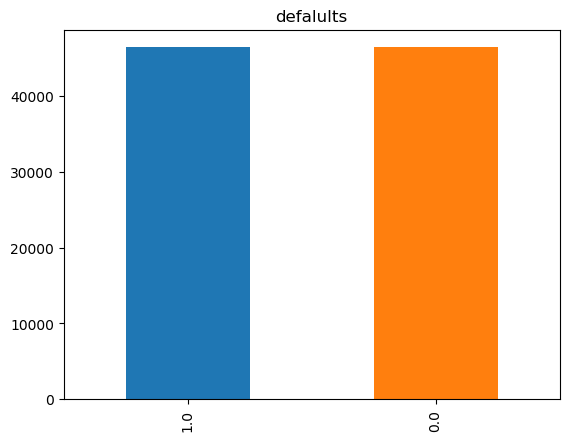

In [207]:
pd.DataFrame(y_train)[0].value_counts().plot('bar').set_title('defalults')

In [208]:
X_train=pd.DataFrame(X_train)
X_train.columns = [x for x in final_woe_df.columns if x != 'Performance Tag']

In [209]:
X_train_app_id=X_train[['Application ID']]

In [210]:
X_train.drop(['Application ID'],axis=1,inplace=True)

In [211]:
X_train.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Presence of open auto loan,Presence of open home loan,Profession,Type of residence
0,-0.158775,0.588133,-0.016444,-0.010774,-0.169838,-0.004073,0.582966,0.551146,-0.003115,-0.174575,0.469564,-0.261585,0.521016,0.437901,0.011745,0.071547,0.087433,-0.003070
1,-0.007090,-0.692587,0.007620,-0.010774,0.084417,-0.004073,0.029213,-0.123312,-0.082764,0.184180,-0.242749,-0.261585,-0.005859,-0.334423,-0.135053,0.071547,-0.014415,0.083371
2,0.050114,-0.692587,-0.016444,-0.010774,0.011032,0.023251,-0.833331,-0.318490,-0.082764,-0.068110,-0.242749,-0.261585,-0.544714,-0.922375,0.011745,0.071547,-0.026442,-0.003070
3,-0.054567,0.130233,0.007620,-0.010774,-0.273975,-0.004073,0.355883,0.327877,-0.082764,-0.207461,-0.242749,-0.261585,0.521016,0.397065,0.011745,0.071547,-0.026442,-0.003070
4,-0.069239,0.537699,-0.016444,0.034085,0.138922,-0.004073,0.582966,0.211766,-0.029016,0.100899,0.292523,-0.261585,0.231336,0.267613,0.011745,0.071547,-0.026442,-0.003070


In [212]:
X_test_app_id=X_test[['Application ID']]

In [213]:
X_test.drop(['Application ID'],axis=1,inplace=True)

In [214]:
X_test.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Presence of open auto loan,Presence of open home loan,Profession,Type of residence
19817,0.073685,0.130233,-0.016444,0.034085,-0.273975,-0.004073,0.138639,0.211766,-0.003115,-0.174575,-0.242749,-0.261585,0.231336,-0.334423,0.011745,-0.235001,0.087433,-0.003070
20143,0.063131,-0.692587,-0.016444,-0.010774,0.011032,-0.004073,0.247597,0.211766,-0.082764,0.184180,-0.242749,-0.261585,0.231336,0.267613,-0.135053,0.071547,0.087433,-0.003070
59226,0.063131,0.587057,0.014780,-0.010774,0.011032,-0.004073,0.355883,0.211766,0.055850,0.184180,-0.242749,0.810088,-0.544714,0.267613,0.011745,0.071547,-0.014415,-0.003070
33354,0.032635,0.130233,0.014780,-0.010774,0.084417,0.023251,0.505458,0.551146,0.044443,0.100899,-0.242749,-0.261585,-0.005859,-0.334423,0.011745,0.071547,0.087433,0.083371
38113,0.036879,-0.692587,0.007620,-0.010774,-0.150090,-0.004073,0.247597,0.327877,0.044443,-0.207461,0.137619,-0.261585,-0.005859,0.297478,0.011745,-0.235001,-0.014415,-0.003070


In [215]:
import statsmodels.api as sm

### Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at Logistic Regression for this problem


#### Logistic Regression

In [216]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [217]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [218]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92773
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58935.
Date:                Sat, 21 Dec 2019   Deviance:                   1.1787e+05
Time:                        20:50:12   Pearson chi2:                 9.23e+04
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -0.0073      0.007     -1.053      0.292      -0.021       0.006
Age                                                                 1.0092      0.114      8.821      0.000       0.785       1.233
Avgas CC Utilization in last 12 months                              0.6216      0.019     31.916      0.000       0.583       0.660
Education                                                           2.0274      0.274      7.413      0.000       1.491       2.563
Gender                                                              1.6227      0.398      4.074      0.000       0.842       2.403
Income                                                              0.2592      0.038      6.744      0.000       0.184       0.335
Marital Status (at the time of application)                        -1.8356      0.789     -2.325      0.020      -3.383      -0.288
No of Inquiries in last 12 months (excluding home & auto loans)     0.4529      0.023     19.389      0.000       0.407       0.499
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0422      0.029     -1.436      0.151      -0.100       0.015
No of dependents                                                    0.9393      0.146      6.444      0.000       0.654       1.225
No of months in current company                                     0.5825      0.051     11.318      0.000       0.482       0.683
No of months in current residence                                  -0.1599      0.034     -4.727      0.000      -0.226      -0.094
No of times 90 DPD or worse in last 6 months                        0.4138      0.022     18.634      0.000       0.370       0.457
No of trades opened in last 6 months                                0.0948      0.024      3.903      0.000       0.047       0.142
Outstanding Balance                                                 0.2942      0.023     12.977      0.000       0.250       0.339
Presence of open auto loan                                          0.0957      0.194      0.493      0.622      -0.285       0.476
Presence of open home loan                                          0.0625      0.060      1.039      0.299      -0.055       0.180
Profession                                                          0.8752      0.170      5.139      0.000       0.541       1.209
Type of residence                                                   0.9140      0.242      3.772      0.000       0.439       1.389
===================================================================================================================================
"""

In [219]:
#Creating python functions to build model again and again and return summary. 
#Also creating a function to calculate the vif again and again.

def build_model_return_summary(X_train_new,y_train):
    X_train_sm = sm.add_constant(X_train_new)
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    
def calculate_vif(X_train_new):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### We will drop variables one by one till we get a good model with satisfy the p value and also the vif value for multicollinearity. P values greater than 0.05 one by one and then once every p value has come down we will use VIF to chck multicollinearity

In [220]:
X_train_new = X_train.drop(['Presence of open auto loan'], axis = 1)
build_model_return_summary(X_train_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92774
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58936.
Date:                Sat, 21 Dec 2019   Deviance:                   1.1787e+05
Time:                        20:50:22   Pearson chi2:                 9.23e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                    

In [221]:
# Deleting the variable No of times 90 DPD or worse in last 6 months
X_train_new = X_train_new.drop(['Presence of open home loan'], axis = 1)
build_model_return_summary(X_train_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92775
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58936.
Date:                Sat, 21 Dec 2019   Deviance:                   1.1787e+05
Time:                        20:50:28   Pearson chi2:                 9.23e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                    

In [222]:
# Deleting variable No of times 90 DPD or worse in last 12 months
X_train_new = X_train_new.drop(['No of Inquiries in last 6 months (excluding home & auto loans)'], axis = 1)
build_model_return_summary(X_train_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92776
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58937.
Date:                Sat, 21 Dec 2019   Deviance:                   1.1787e+05
Time:                        20:50:33   Pearson chi2:                 9.23e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                    

#### Now we will check the variance inflation factor and remove variables with high VIF values

In [223]:
calculate_vif(X_train_new)

,Features,VIF
12,Outstanding Balance,2.35
1,Avgas CC Utilization in last 12 months,2.20
11,No of trades opened in last 6 months,2.05
6,No of Inquiries in last 12 months (excluding h...,1.95
10,No of times 90 DPD or worse in last 6 months,1.42
9,No of months in current residence,1.32
4,Income,1.10
8,No of months in current company,1.04
0,Age,1.01
5,Marital Status (at the time of application),1.01


In [224]:
X_train_sm=sm.add_constant(X_train_new)
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model=log_model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92776
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58937.
Date:                Sat, 21 Dec 2019   Deviance:                   1.1787e+05
Time:                        20:50:44   Pearson chi2:                 9.23e+04
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -0.0073      0.007     -1.051      0.293      -0.021       0.006
Age                                                                 1.0079      0.114      8.810      0.000       0.784       1.232
Avgas CC Utilization in last 12 months                              0.6232      0.019     32.137      0.000       0.585       0.661
Education                                                           2.0267      0.273      7.413      0.000       1.491       2.563
Gender                                                              1.6222      0.398      4.073      0.000       0.842       2.403
Income                                                              0.2612      0.038      6.801      0.000       0.186       0.337
Marital Status (at the time of application)                        -1.8387      0.789     -2.329      0.020      -3.386      -0.292
No of Inquiries in last 12 months (excluding home & auto loans)     0.4375      0.020     21.597      0.000       0.398       0.477
No of dependents                                                    0.9423      0.146      6.467      0.000       0.657       1.228
No of months in current company                                     0.5835      0.051     11.340      0.000       0.483       0.684
No of months in current residence                                  -0.1598      0.034     -4.726      0.000      -0.226      -0.094
No of times 90 DPD or worse in last 6 months                        0.4118      0.022     18.590      0.000       0.368       0.455
No of trades opened in last 6 months                                0.0933      0.024      3.859      0.000       0.046       0.141
Outstanding Balance                                                 0.2949      0.022     13.273      0.000       0.251       0.338
Profession                                                          0.8759      0.170      5.144      0.000       0.542       1.210
Type of residence                                                   0.9179      0.242      3.788      0.000       0.443       1.393
===================================================================================================================================
"""

In [225]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [226]:
X_test_new=X_test[[x for x in X_train_new.columns]]
X_test_new.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Profession,Type of residence
19817,0.073685,0.130233,-0.016444,0.034085,-0.273975,-0.004073,0.138639,-0.003115,-0.174575,-0.242749,-0.261585,0.231336,-0.334423,0.087433,-0.003070
20143,0.063131,-0.692587,-0.016444,-0.010774,0.011032,-0.004073,0.247597,-0.082764,0.184180,-0.242749,-0.261585,0.231336,0.267613,0.087433,-0.003070
59226,0.063131,0.587057,0.014780,-0.010774,0.011032,-0.004073,0.355883,0.055850,0.184180,-0.242749,0.810088,-0.544714,0.267613,-0.014415,-0.003070
33354,0.032635,0.130233,0.014780,-0.010774,0.084417,0.023251,0.505458,0.044443,0.100899,-0.242749,-0.261585,-0.005859,-0.334423,0.087433,0.083371
38113,0.036879,-0.692587,0.007620,-0.010774,-0.150090,-0.004073,0.247597,0.044443,-0.207461,0.137619,-0.261585,-0.005859,0.297478,-0.014415,-0.003070


In [227]:
# Getting the predicted values on the train set
y_train_pred  = model.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.58186604, 0.38213642, 0.20114929, 0.49503502, 0.62956349,
       0.56995395, 0.65507826, 0.68292964, 0.55310581, 0.70882519])

In [228]:
y_train_pred.shape

(92792,)

In [229]:
X_train_app_id.isnull().sum()

Application ID    0
dtype: int64

In [230]:
y_train_pred_final = pd.DataFrame({'Default':pd.DataFrame(y_train)[0], 'Default_Prob':y_train_pred,'Application_id':X_train_app_id['Application ID']})


In [231]:
y_train_pred_final.shape

(92792, 3)

In [232]:
#y_train_pred_final['Application ID'] = X_train_app_id['Application ID']
y_train_pred_final.sort_values(by='Default_Prob', ascending=False)

,Default,Default_Prob,Application_id
31496,0.0,0.906582,7.244840e+08
38086,0.0,0.888526,6.748420e+08
12450,0.0,0.887367,4.714815e+08
27186,0.0,0.881405,1.894216e+08
40098,0.0,0.878788,9.843391e+08
23126,0.0,0.875309,2.131085e+08
36730,0.0,0.875014,6.404797e+08
20674,1.0,0.873461,8.594617e+08
40242,0.0,0.869541,3.252615e+08
79470,1.0,0.868820,8.594793e+08


In [233]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Default,Default_Prob,Application_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.581866,736740144.0,1,1,1,1,1,1,0,0,0,0
1,0.0,0.382136,843972895.0,1,1,1,1,0,0,0,0,0,0
2,0.0,0.201149,756792783.0,1,1,1,0,0,0,0,0,0,0
3,0.0,0.495035,445674876.0,1,1,1,1,1,0,0,0,0,0
4,0.0,0.629563,354601724.0,1,1,1,1,1,1,1,0,0,0


In [234]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.522804  0.997952  0.047655
0.3   0.3  0.627198  0.947495  0.306901
0.4   0.4  0.650821  0.852940  0.448702
0.5   0.5  0.635583  0.695275  0.575890
0.6   0.6  0.591193  0.441568  0.740818
0.7   0.7  0.516930  0.119795  0.914066
0.8   0.8  0.500097  0.000819  0.999375
0.9   0.9  0.499989  0.000000  0.999978


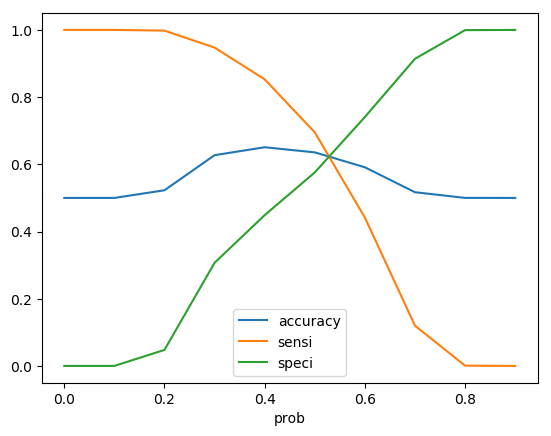

In [235]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.52 is the optimum point to take it as a cutoff probability as we need high sensitivity


In [236]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Application_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.581866,736740144.0,1,1,1,1,1,1,0,0,0,0,1
1,0.0,0.382136,843972895.0,1,1,1,1,0,0,0,0,0,0,0
2,0.0,0.201149,756792783.0,1,1,1,0,0,0,0,0,0,0,0
3,0.0,0.495035,445674876.0,1,1,1,1,1,0,0,0,0,0,0
4,0.0,0.629563,354601724.0,1,1,1,1,1,1,1,0,0,0,1


In [237]:
metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.6303129580136219

In [238]:
print("roc_auc_score", metrics.roc_auc_score(y_train_pred_final.Default, y_train_pred_final.final_predicted))

roc_auc_score 0.6303129580136219


In [239]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted )
confusion2

array([[28055, 18341],
       [15963, 30433]], dtype=int64)

In [240]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [241]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.655940167255798

In [242]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.6046857487714458

In [243]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

0.3953142512285542

In [244]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.6239594866117194

In [245]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.6373529010859194

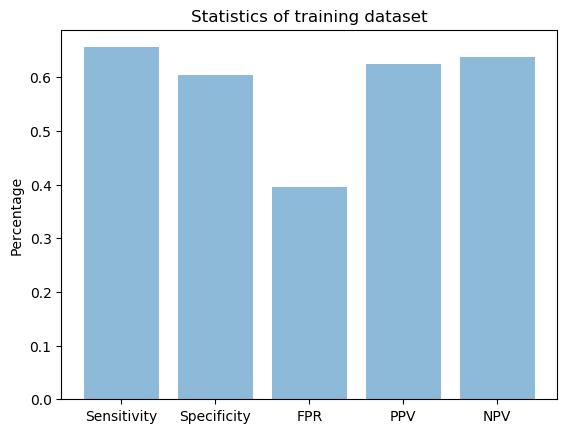

In [246]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of training dataset')

plt.show()

In [247]:
X_test_sm=sm.add_constant(X_test_new)
y_test_pred  = model.predict(X_test_sm).values.reshape(-1)
y_test_pred[:10]

array([0.49741058, 0.45695763, 0.75875365, 0.59999495, 0.38595152,
       0.72450162, 0.4898944 , 0.70311911, 0.42119557, 0.48464045])

In [248]:
y_test_pred_final = pd.DataFrame({'Default':y_test.values, 'Default_Prob':y_test_pred,'Application_id':X_test_app_id['Application ID']})
y_test_pred_final.sort_values(by='Default_Prob', ascending=False)

,Default,Default_Prob,Application_id
67079,0.0,0.898636,703301287
69239,0.0,0.896217,154751851
67453,0.0,0.890848,88427538
67462,0.0,0.879237,687481252
52194,0.0,0.862773,799921942
64110,0.0,0.843743,830711282
60432,0.0,0.836097,931688719
58007,0.0,0.832275,698112084
55895,0.0,0.831109,660518788
46783,0.0,0.825728,15866986


### Testing on the test dataset with optimal cutoff probability

In [249]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Default_Prob.map( lambda x: 1 if x > 0.52 else 0)

y_test_pred_final.head()

,Default,Default_Prob,Application_id,final_predicted
19817,0.0,0.497411,824730661,0
20143,0.0,0.456958,632618272,0
59226,0.0,0.758754,353210234,1
33354,0.0,0.599995,676919255,1
38113,0.0,0.385952,360989573,0


In [250]:
metrics.accuracy_score(y_test_pred_final.Default, y_test_pred_final.final_predicted)

0.6032815281720637

In [251]:
print("roc_auc_score", metrics.roc_auc_score(y_test_pred_final.Default, y_test_pred_final.final_predicted))

roc_auc_score 0.6227344656932733


In [252]:
confusion = metrics.confusion_matrix(y_test_pred_final.Default, y_test_pred_final.final_predicted )
confusion

array([[12001,  7948],
       [  297,   537]], dtype=int64)

In [253]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [254]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.6438848920863309

In [255]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.6015840393002155

In [256]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

0.39841596069978447

In [257]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.06328815556865056

In [258]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.9758497316636852

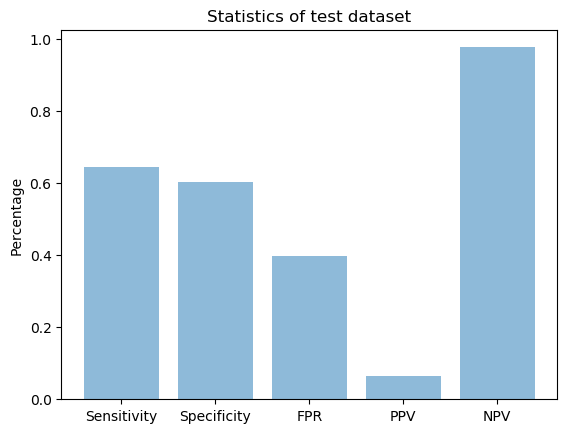

In [259]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of test dataset')

plt.show()

### Accessing the model for rejected population

In [260]:
# check area under curve
X=reject_woe_df.drop(['Application ID','Performance Tag'],axis=1)
X_reject_new=X[[y for y in X_train_new.columns]]
X_reject_sm=sm.add_constant(X_reject_new)
pred_reject_prob = model.predict(sm.add_constant(X_reject_sm)).values.reshape(-1)
len(pred_reject_prob)
#pred_reject_prob[2:5]
#Creating a dataframe of 1 as all rejected population will default as per bank.
d=np.ones(shape=(len(pred_reject_prob),))
#d.shape
#d = pd.DataFrame(1, index=np.arange(len(pred_reject_prob)), columns=['Default'])
#d.head()
#reject_pred_final = pd.DataFrame({'Default':d, 'Default_Prob':pred_reject_prob})
reject_pred_final = pd.DataFrame({'Default':d, 'Default_Prob':pred_reject_prob,'Application_id':reject_demprphc_app_id_df['Application ID']})
reject_pred_final.sort_values(by='Default_Prob', ascending=False)

,Default,Default_Prob,Application_id
70635,1.0,0.893843,416075975
69729,1.0,0.877419,508110128
69567,1.0,0.824116,344210305
69935,1.0,0.811745,409565986
70452,1.0,0.811561,572037155
70362,1.0,0.811479,995035423
70311,1.0,0.810109,391753466
70020,1.0,0.808080,759550876
69946,1.0,0.807160,279006833
70343,1.0,0.804551,759221897


In [261]:
reject_pred_final['final_predicted'] = reject_pred_final.Default_Prob.map( lambda x: 1 if x > 0.52 else 0)

reject_pred_final.head()

,Default,Default_Prob,Application_id,final_predicted
69010,1.0,0.656608,906908303,1
69011,1.0,0.718510,10990583,1
69012,1.0,0.757018,589678446,1
69013,1.0,0.737156,809411322,1
69014,1.0,0.730776,150246616,1


In [262]:
metrics.accuracy_score(reject_pred_final.Default, reject_pred_final.final_predicted)

0.9711876317638791

In [263]:
confusion = metrics.confusion_matrix(reject_pred_final.Default, reject_pred_final.final_predicted )
confusion

array([[   0,    0],
       [  41, 1382]], dtype=int64)

In [264]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [265]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.9711876317638791

In [266]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

nan

In [267]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

nan

In [268]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

1.0

In [269]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.0

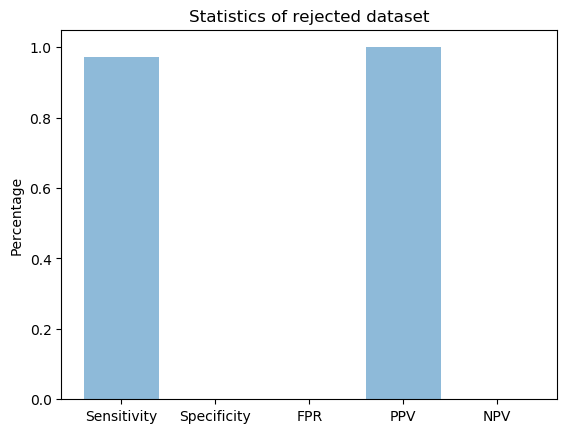

In [270]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of rejected dataset')

plt.show()

### When we apply final logistic model on rejected population we can observe that it has accuracy and senstivity of 97 %

#### Applying the Decision tree model  and checking its stats

In [271]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, pd.DataFrame(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [272]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

        0.0       0.97      0.81      0.88     19949
        1.0       0.07      0.34      0.12       834

avg / total       0.93      0.79      0.85     20783



In [273]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_default, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[16195  3754]
 [  551   283]]
Sensitivity: 	0.34
Specificity: 	0.81


Now we will try to tune the hyperparameters

- Maximum Depth
- Minimum Samples Leaf
- Minimum Samples Split
- Criterion

We will use gridsearchCV to tune the hyperparameters

In [274]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,pd.DataFrame(y_train))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   44.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [275]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.528038,0.039858,0.006241,0.007644,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792241,...,0.836247,0.022018,13,0.850132,0.833082,0.833149,0.832624,0.832880,0.836373,0.006882
1,0.535013,0.028139,0.009652,0.007897,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792241,...,0.836247,0.022018,13,0.850132,0.833082,0.833149,0.832624,0.832880,0.836373,0.006882
2,0.505143,0.013610,0.003117,0.006234,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792241,...,0.836247,0.022018,13,0.850132,0.833082,0.833149,0.832624,0.832880,0.836373,0.006882
3,0.507934,0.014167,0.000000,0.000000,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792241,...,0.836247,0.022018,13,0.850132,0.833082,0.833149,0.832624,0.832880,0.836373,0.006882
4,0.674848,0.030311,0.003124,0.006249,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.860668,...,0.945566,0.042534,3,0.967777,0.945887,0.941199,0.938155,0.937481,0.946100,0.011237
5,0.724499,0.037555,0.000000,0.000000,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.860668,...,0.945566,0.042534,3,0.967777,0.945887,0.941199,0.938155,0.937481,0.946100,0.011237
6,0.730671,0.014624,0.003546,0.006100,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.859159,...,0.940835,0.040990,7,0.964800,0.941954,0.935771,0.933346,0.930759,0.941326,0.012309
7,0.719082,0.029059,0.003119,0.006238,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.859159,...,0.940835,0.040990,7,0.964800,0.941954,0.935771,0.933346,0.930759,0.941326,0.012309
8,0.372922,0.013555,0.003138,0.006275,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.795959,...,0.839016,0.021791,9,0.857460,0.833163,0.840962,0.832678,0.832934,0.839439,0.009534
9,0.386516,0.014577,0.000000,0.000000,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.795959,...,0.839016,0.021791,9,0.857460,0.833163,0.840962,0.832678,0.832934,0.839439,0.009534


In [276]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9487563583067505
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Now we will create a model with the parameters found with best accuracy

- min_samples_leaf = 50
- min-Samples_aplit = 50
- max_depth = 10
- criterion = gini

In [277]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, pd.DataFrame(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [278]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9589087234759178

In [279]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     19949
        1.0       0.08      0.00      0.00       834

avg / total       0.92      0.96      0.94     20783



In [280]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[19927    22]
 [  832     2]]


In [281]:
pd.DataFrame(y_pred)[0].value_counts()

0.0    20759
1.0       24
Name: 0, dtype: int64

In [282]:
y_test.value_counts()

0.0    19949
1.0      834
Name: Performance Tag, dtype: int64

In [283]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pd.DataFrame(y_pred), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.0
Specificity: 	1.0


In [284]:
y_pred.shape

(20783,)

### Accessing on rejecting population

In [285]:
X_reject=reject_woe_df.drop(['Application ID','Performance Tag'],axis=1)

pred_reject = clf_gini.predict(X_reject)
len(pred_reject)
#pred_reject_prob[2:5]
#Creating a dataframe of 1 as all rejected population will default as per bank.
d=np.ones(shape=(len(pred_reject),))
#d.shape

In [286]:
print(classification_report(d, pred_reject))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       1.00      0.02      0.04      1423

avg / total       1.00      0.02      0.04      1423



C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [287]:
print(confusion_matrix(d,pred_reject))

[[   0    0]
 [1395   28]]


In [288]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(d, pd.DataFrame(pred_reject), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.02
Specificity: 	0.0


C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\imblearn\metrics\classification.py:242: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


In [289]:
confusion=metrics.confusion_matrix(d,pred_reject) 

In [290]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [291]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.019676739283204497

In [292]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

nan

In [293]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

nan

In [294]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

1.0

In [295]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.0

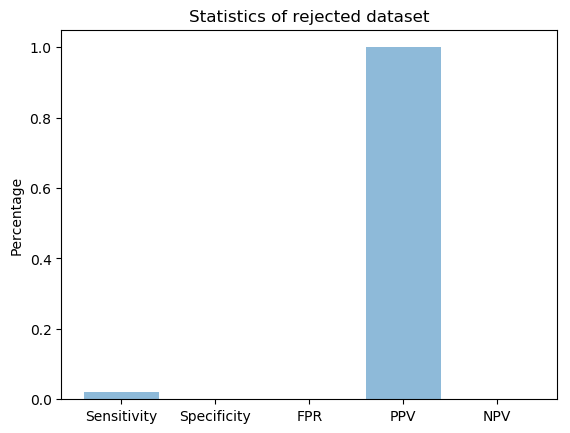

In [296]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of rejected dataset')

plt.show()

#### This model cant be used for prediction as its sensitivity is very less and we want model with high sensivity because we want to predict defaults.

Now that we have looked at Logistic Regression and Decision trees, we will look at Ensemble model that is Random Forest


### Building the Random Forest model with demographic and credit bureau data.

In [297]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [298]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [299]:
# fit model
rfc.fit(X_train, pd.DataFrame(y_train))

C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [300]:
# predict churn on test data
y_pred = rfc.predict(X_test)

In [301]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     19949
        1.0       0.08      0.00      0.00       834

avg / total       0.92      0.96      0.94     20783



In [302]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[19937    12]
 [  833     1]]


In [303]:
print(accuracy_score(y_test,y_pred))

0.959341769715633


Once again, we are going to tune the hyperparameters

- Number of trees (estimators)
- Maximum Depth
- Minimum Samples leaf
- Minimum Samples Split
- Maximum features

In [304]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [305]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  7.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [306]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9646413483921028 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [307]:
#  model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=200)

In [308]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [309]:
# predict
predictions = rfc.predict(X_test)

In [310]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     19949
        1.0       0.05      0.00      0.00       834

avg / total       0.92      0.96      0.94     20783



In [311]:
print(confusion_matrix(y_test,predictions))

[[19909    40]
 [  832     2]]


In [312]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, pd.DataFrame(predictions), average='binary')
print("Sensitivity: \t", round(sensitivity, 4), "\n", "Specificity: \t", round(specificity, 4), sep='')

Sensitivity: 	0.0024
Specificity: 	0.998


In [313]:
pd.DataFrame(predictions)[0].value_counts()

0.0    20741
1.0       42
Name: 0, dtype: int64

In [314]:
y_test.value_counts()

0.0    19949
1.0      834
Name: Performance Tag, dtype: int64

### Accessing on rejecting population

In [315]:
X_reject=reject_woe_df.drop(['Application ID','Performance Tag'],axis=1)

pred_reject = rfc.predict(X_reject)
len(pred_reject)
#pred_reject_prob[2:5]
#Creating a dataframe of 1 as all rejected population will default as per bank.
d=np.ones(shape=(len(pred_reject),))
#d.shape

In [316]:
print(classification_report(d, pred_reject))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       1.00      0.00      0.01      1423

avg / total       1.00      0.00      0.01      1423



C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [317]:
print(confusion_matrix(d,pred_reject))

[[   0    0]
 [1419    4]]


In [318]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(d, pd.DataFrame(pred_reject), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.0
Specificity: 	0.0


C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\imblearn\metrics\classification.py:242: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


In [319]:
confusion=metrics.confusion_matrix(d,pred_reject) 

In [320]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [321]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.0028109627547434997

In [322]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

nan

In [323]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

nan

In [324]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

1.0

In [325]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.0

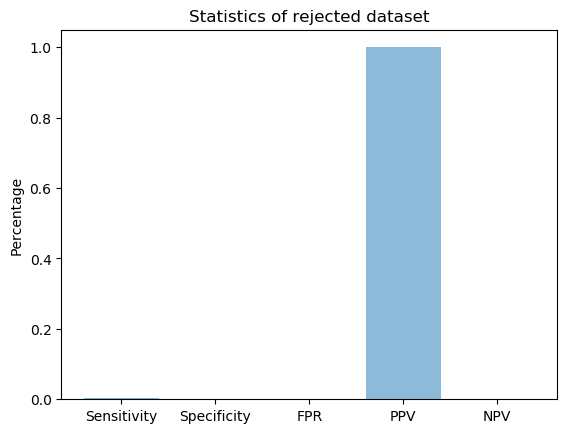

In [326]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of rejected dataset')

plt.show()

### Using the SVM model

In [327]:
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC
model = SVC(C = 1, kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [328]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[14775,  5174],
       [  512,   322]], dtype=int64)

In [329]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.7264110089977386
precision 0.05858806404657933
recall 0.38609112709832133


## Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

In [330]:
# specify other hyperparameters
params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}

# model
model2 = SVC(C=100, gamma=0.01, kernel="rbf")

model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))
print("roc_auc_score", metrics.roc_auc_score(y_test, y_pred))

[[15236  4713]
 [  546   288]] 

accuracy 0.7469566472597796
precision 0.057588482303539294
sensitivity/recall 0.34532374100719426
roc_auc_score 0.5545356486378396


### Accessing  model with default paarameters on rejecting population

In [331]:
X_reject=reject_woe_df.drop(['Application ID','Performance Tag'],axis=1)

pred_reject = model.predict(X_reject)
len(pred_reject)
#pred_reject_prob[2:5]
#Creating a dataframe of 1 as all rejected population will default as per bank.
d=np.ones(shape=(len(pred_reject),))
#d.shape

In [332]:
print(classification_report(d, pred_reject))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       1.00      0.38      0.55      1423

avg / total       1.00      0.38      0.55      1423



C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [333]:
print(confusion_matrix(d,pred_reject))

[[  0   0]
 [888 535]]


In [334]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(d, pd.DataFrame(pred_reject), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.38
Specificity: 	0.0


C:\Users\tv716e\AppData\Local\Continuum\anaconda3\lib\site-packages\imblearn\metrics\classification.py:242: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


In [335]:
confusion=metrics.confusion_matrix(d,pred_reject) 

In [336]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [337]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.3759662684469431

In [338]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

nan

In [339]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

nan

In [340]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

1.0

In [341]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.0

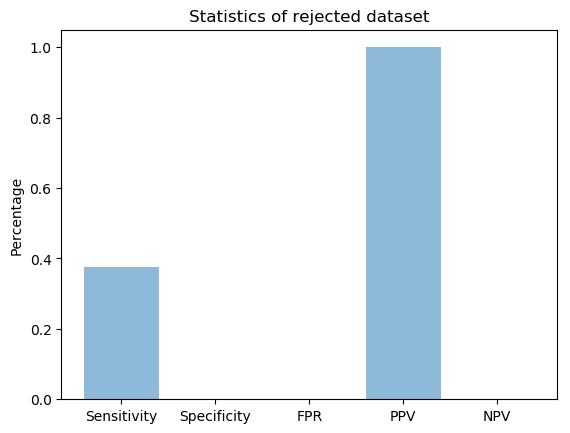

In [342]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of rejected dataset')

plt.show()

## We saw that  out of all the models logictic regression model is the best model which gave maximum accuracy on the rejected population and also maximum sensitivity and roc score. We will use logistic regression as our final model for evaluation.

#### We will now make application scorecard for logistic regression model with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

In [343]:
X_train_sm=sm.add_constant(X_train_new)
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model=log_model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                92792
Model:                            GLM   Df Residuals:                    92776
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58937.
Date:                Sat, 21 Dec 2019   Deviance:                   1.1787e+05
Time:                        21:28:15   Pearson chi2:                 9.23e+04
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -0.0073      0.007     -1.051      0.293      -0.021       0.006
Age                                                                 1.0079      0.114      8.810      0.000       0.784       1.232
Avgas CC Utilization in last 12 months                              0.6232      0.019     32.137      0.000       0.585       0.661
Education                                                           2.0267      0.273      7.413      0.000       1.491       2.563
Gender                                                              1.6222      0.398      4.073      0.000       0.842       2.403
Income                                                              0.2612      0.038      6.801      0.000       0.186       0.337
Marital Status (at the time of application)                        -1.8387      0.789     -2.329      0.020      -3.386      -0.292
No of Inquiries in last 12 months (excluding home & auto loans)     0.4375      0.020     21.597      0.000       0.398       0.477
No of dependents                                                    0.9423      0.146      6.467      0.000       0.657       1.228
No of months in current company                                     0.5835      0.051     11.340      0.000       0.483       0.684
No of months in current residence                                  -0.1598      0.034     -4.726      0.000      -0.226      -0.094
No of times 90 DPD or worse in last 6 months                        0.4118      0.022     18.590      0.000       0.368       0.455
No of trades opened in last 6 months                                0.0933      0.024      3.859      0.000       0.046       0.141
Outstanding Balance                                                 0.2949      0.022     13.273      0.000       0.251       0.338
Profession                                                          0.8759      0.170      5.144      0.000       0.542       1.210
Type of residence                                                   0.9179      0.242      3.788      0.000       0.443       1.393
===================================================================================================================================
"""

In [344]:
pd.DataFrame(model.params)

,0
const,-0.007332
Age,1.007936
Avgas CC Utilization in last 12 months,0.623186
Education,2.026737
Gender,1.622195
Income,0.261227
Marital Status (at the time of application),-1.838713
No of Inquiries in last 12 months (excluding home & auto loans),0.437528
No of dependents,0.942334
No of months in current company,0.583546


In [345]:
intercept=pd.DataFrame(model.params)[0][0]
print(intercept)

-0.007332176399285406


In [346]:
final_woe_df.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Performance Tag,Presence of open auto loan,Presence of open home loan,Profession,Type of residence,Application ID
0,0.036879,-0.692587,0.014780,0.034085,-0.273975,-0.004073,-0.833331,-0.31849,-0.082764,-0.232160,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.026442,-0.00307,954457215
1,-0.007090,-0.692587,-0.016444,-0.010774,-0.385535,-0.004073,-0.833331,-0.31849,-0.029016,-0.174575,-0.065038,-0.261585,-0.544714,-0.760813,0.0,0.011745,0.071547,-0.014415,-0.00307,432830445
2,0.032635,-0.692587,0.014780,-0.010774,-0.169838,0.023251,-0.833331,-0.31849,-0.082764,-0.207461,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.014415,-0.00307,941387308
3,-0.054567,-0.692587,0.014780,-0.010774,-0.385535,-0.004073,-0.833331,-0.31849,0.044443,-0.207461,0.127465,-0.261585,-0.544714,0.297478,0.0,-0.135053,-0.235001,0.087433,-0.00307,392161677
4,0.032635,-0.692587,-0.016444,0.034085,-0.169838,-0.004073,-0.833331,-0.31849,-0.003115,-0.174575,-0.065038,-0.261585,-0.544714,-0.859070,0.0,0.011745,-0.235001,-0.026442,-0.00307,182011211


In [347]:
selected_params = [x for x in pd.DataFrame(model.params).index if x!='const']
print(selected_params)

['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender', 'Income', 'Marital Status (at the time of application)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'No of dependents', 'No of months in current company', 'No of months in current residence', 'No of times 90 DPD or worse in last 6 months', 'No of trades opened in last 6 months', 'Outstanding Balance', 'Profession ', 'Type of residence']


In [348]:
woe_transform_df_selected = final_woe_df[selected_params]

In [349]:
lr_woe_mod_params=pd.DataFrame(model.params[1:])
print(woe_transform_df_selected.shape)
print(lr_woe_mod_params.shape)

(69276, 15)
(15, 1)


In [350]:
# Multiply lr coefficients to observation WOE Values
scorecard_lr = woe_transform_df_selected[lr_woe_mod_params.index].apply(lambda x: x*lr_woe_mod_params[0].T,axis=1)

In [351]:
# Get Logit Values
scorecard_lr['logit'] = scorecard_lr[list(scorecard_lr.columns)].sum(axis=1) + intercept

In [352]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
#Here we calculate the odds of default and probability of bads
scorecard_lr['odds'] = np.exp(scorecard_lr['logit'])
scorecard_lr['probs'] = scorecard_lr['odds'] / (scorecard_lr['odds'] + 1)

In [353]:
# Set up Scoring Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

In [354]:
# Score
scorecard_lr['score'] = offset - factor * scorecard_lr['logit']

In [355]:
print(scorecard_lr.shape)
print(final_woe_df.shape)

(69276, 19)
(69276, 20)


In [356]:
# Add Back Customer ID and Target Features
scorecard_lr['Application_id'] = final_woe_df['Application ID']
scorecard_lr['Default'] = final_woe_df['Performance Tag']

In [357]:
scorecard_lr.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,...,No of trades opened in last 6 months,Outstanding Balance,Profession,Type of residence,logit,odds,probs,score,Application_id,Default
0,0.037171,-0.43161,0.029955,0.055292,-0.071570,0.007489,-0.364605,-0.077991,-0.135476,0.010395,...,-0.0508,-0.253311,-0.023162,-0.002818,-1.386091,0.250051,0.200033,373.555565,954457215,0.0
1,-0.007146,-0.43161,-0.033327,-0.017477,-0.100712,0.007489,-0.364605,-0.027343,-0.101872,0.010395,...,-0.0508,-0.224338,-0.012627,-0.002818,-1.471843,0.229502,0.186663,376.029858,432830445,0.0
2,0.032894,-0.43161,0.029955,-0.017477,-0.044366,-0.042752,-0.364605,-0.077991,-0.121063,0.010395,...,-0.0508,-0.253311,-0.012627,-0.002818,-1.461228,0.231951,0.188280,375.723555,941387308,0.0
3,-0.055001,-0.43161,0.029955,-0.017477,-0.100712,0.007489,-0.364605,0.041880,-0.121063,-0.020372,...,-0.0508,0.087716,0.076585,-0.002818,-1.035883,0.354913,0.261945,363.450706,392161677,0.0
4,0.032894,-0.43161,-0.033327,0.055292,-0.044366,0.007489,-0.364605,-0.002935,-0.101872,0.010395,...,-0.0508,-0.253311,-0.023162,-0.002818,-1.317788,0.267727,0.211187,371.584754,182011211,0.0


### Visualising the distribution of score for good custmers in original dataset

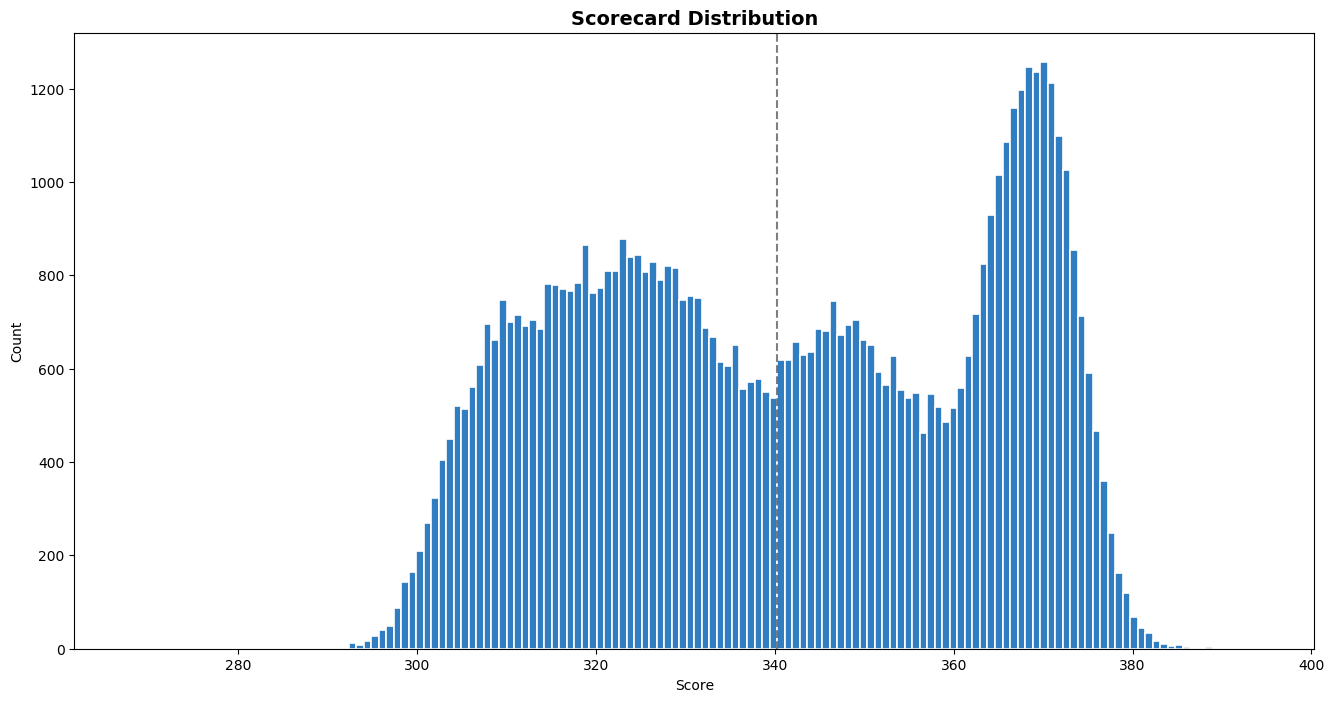

In [358]:
# Plot Distribution of Scores
plt.figure(figsize=(16,8))

plt.hist(scorecard_lr[scorecard_lr['Default']==0.0]['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(scorecard_lr['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
#plt.text(48, 297, 'Mean Score: 361', color='red', fontweight='bold', style='italic', fontsize=8)
plt.xlabel('Score')
plt.ylabel('Count');

### Visualising the distribution of score for bad custmers in original dataset

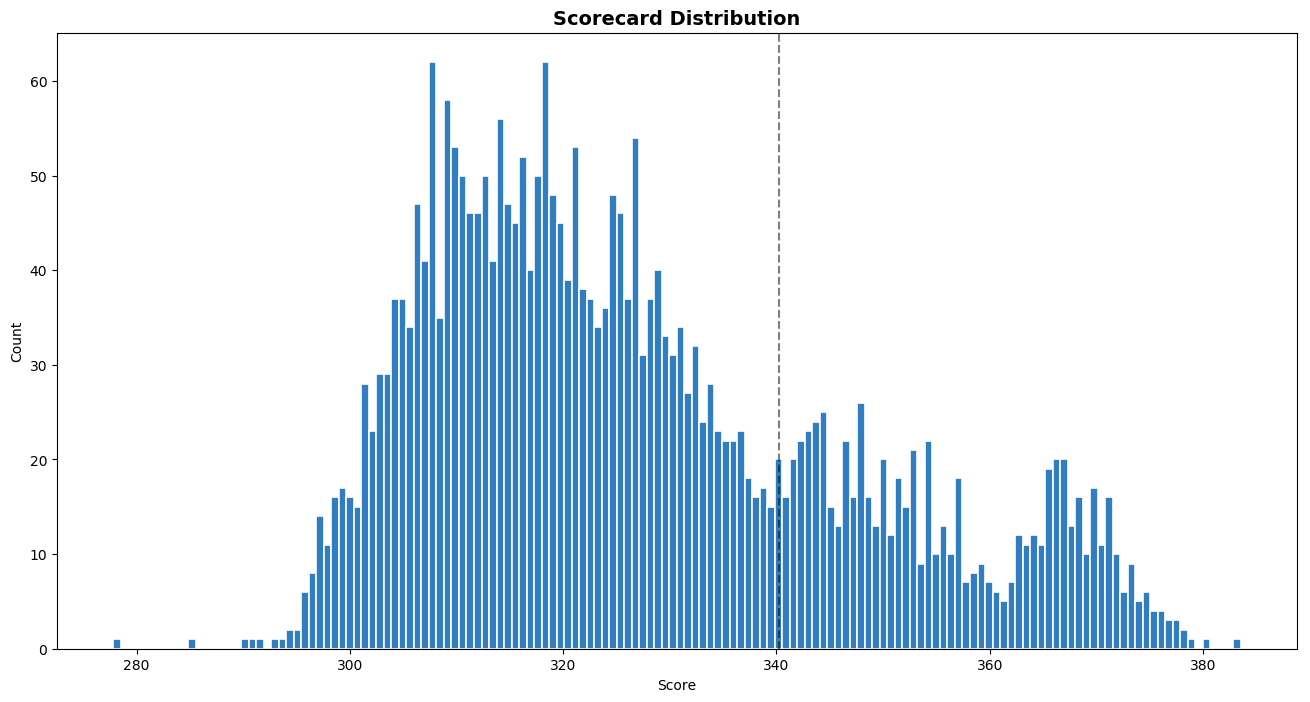

In [359]:
# Plot Distribution of Scores
plt.figure(figsize=(16,8))

plt.hist(scorecard_lr[scorecard_lr['Default']==1.0]['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(scorecard_lr['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
#plt.text(48, 297, 'Mean Score: 361', color='red', fontweight='bold', style='italic', fontsize=8)
plt.xlabel('Score')
plt.ylabel('Count');

### From above graph we see that people will higher scores are less likely to default and people with lower scores are more likely to default.

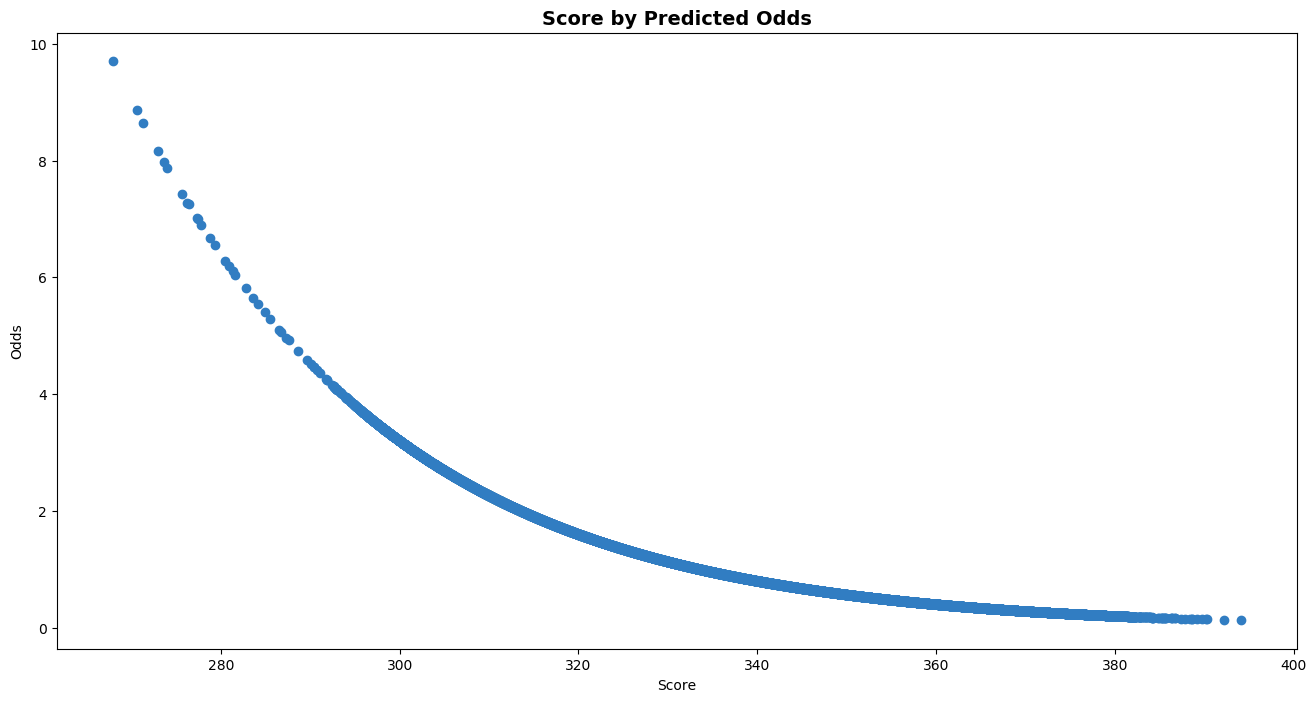

In [360]:


# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=scorecard_lr,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds');



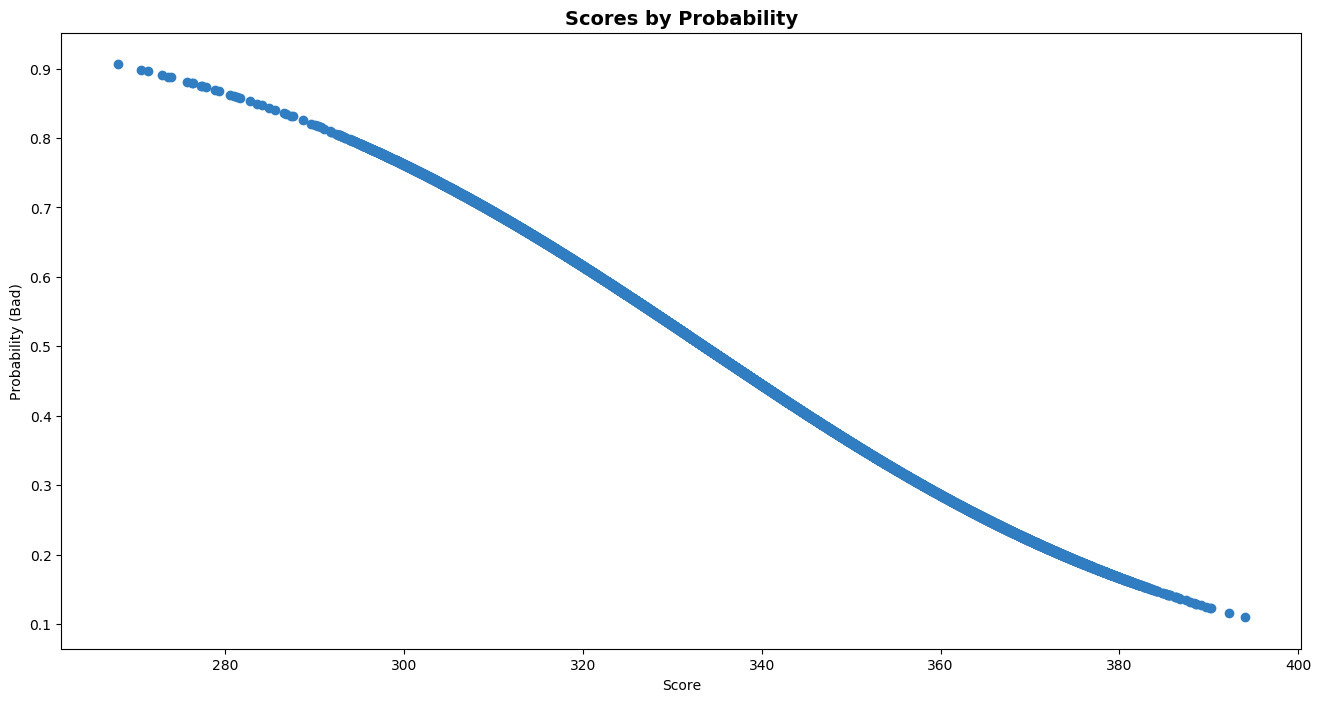

In [361]:
# Plot Scores Against Probabilities
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=scorecard_lr,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Bad)');

### Analyzing the scores for the rejected population

In [362]:
reject_woe_df.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,No of times 90 DPD or worse in last 6 months,No of trades opened in last 6 months,Outstanding Balance,Performance Tag,Presence of open auto loan,Presence of open home loan,Profession,Type of residence,Application ID
69010,0.032635,0.537699,0.014780,-0.010774,0.362294,0.023251,0.247597,0.211766,0.044443,0.198893,0.469564,-0.261585,0.521016,0.397065,NaN,0.011745,0.071547,-0.026442,-0.00307,906908303
69011,0.036879,0.130233,0.007620,0.034085,0.095736,-0.004073,0.582966,0.551146,-0.029016,0.000917,-0.065038,0.585615,0.430641,0.437901,NaN,0.011745,0.071547,0.087433,-0.00307,10990583
69012,0.036879,0.561733,-0.016444,-0.010774,0.138922,-0.004073,0.164190,-0.318490,0.055850,-0.068110,-0.242749,0.995631,0.231336,0.456726,NaN,0.011745,0.071547,0.087433,-0.00307,589678446
69013,0.050114,0.561733,0.007620,-0.010774,0.084417,-0.004073,0.582966,0.327877,0.055850,-0.174575,-0.242749,0.585615,0.231336,0.437901,NaN,0.011745,0.071547,-0.026442,-0.00307,809411322
69014,0.050114,0.537699,-0.026134,0.034085,0.084417,-0.004073,0.505458,0.551146,-0.029016,-0.207461,-0.242749,0.810088,0.430641,0.437901,NaN,-0.135053,0.071547,-0.026442,-0.00307,150246616


In [363]:
selected_params = [x for x in pd.DataFrame(model.params).index if x!='const']
print(selected_params)

['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender', 'Income', 'Marital Status (at the time of application)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'No of dependents', 'No of months in current company', 'No of months in current residence', 'No of times 90 DPD or worse in last 6 months', 'No of trades opened in last 6 months', 'Outstanding Balance', 'Profession ', 'Type of residence']


In [364]:
woe_transform_df_selected = reject_woe_df[selected_params]

In [365]:
lr_woe_mod_params=pd.DataFrame(model.params[1:])
print(woe_transform_df_selected.shape)
print(lr_woe_mod_params.shape)

(1423, 15)
(15, 1)


In [366]:
# Multiply lr coefficients to observation WOE Values
scorecard = woe_transform_df_selected[lr_woe_mod_params.index].apply(lambda x: x*lr_woe_mod_params[0].T,axis=1)

In [367]:
# Get Logit Values
scorecard['logit'] = scorecard[list(scorecard.columns)].sum(axis=1) + intercept

In [368]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [369]:
# Set up Scoring Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

In [370]:
# Score
scorecard['score'] = offset - factor * scorecard['logit']

In [371]:
print(scorecard.shape)
print(reject_woe_df.shape)

(1423, 19)
(1423, 20)


In [372]:
# Add Back Customer ID and Target Features
scorecard['Application_id'] = reject_woe_df['Application ID']
scorecard['Default'] = final_woe_df['Performance Tag']

In [373]:
scorecard.head(100)

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of dependents,No of months in current company,No of months in current residence,...,No of trades opened in last 6 months,Outstanding Balance,Profession,Type of residence,logit,odds,probs,score,Application_id,Default
69010,0.032894,0.335086,0.029955,-0.017477,0.094641,-0.042752,0.108331,0.041880,0.116063,-0.075047,...,0.048590,0.117081,-0.023162,-0.002818,0.648216,1.912126,0.656608,314.857887,906908303,NaN
69011,0.037171,0.081160,0.015445,0.055292,0.025009,0.007489,0.255064,-0.027343,0.000535,0.010395,...,0.040162,0.129122,0.076585,-0.002818,0.937085,2.552530,0.718510,306.522877,10990583,NaN
69012,0.037171,0.350064,-0.033327,-0.017477,0.036290,0.007489,0.071838,0.052630,-0.039745,0.038797,...,0.021574,0.134673,0.076585,-0.002818,1.136402,3.115539,0.757018,300.771803,589678446,NaN
69013,0.050511,0.350064,0.015445,-0.017477,0.022052,0.007489,0.255064,0.052630,-0.101872,0.038797,...,0.021574,0.129122,-0.023162,-0.002818,1.031237,2.804533,0.737156,303.806224,809411322,NaN
69014,0.050511,0.335086,-0.052966,0.055292,0.022052,0.007489,0.221152,-0.027343,-0.121063,0.038797,...,0.040162,0.129122,-0.023162,-0.002818,0.998565,2.714385,0.730776,304.748932,150246616,NaN
69015,0.037171,0.081160,0.029955,-0.017477,0.022052,0.007489,0.108331,-0.002935,0.058879,-0.021995,...,-0.050800,0.117081,0.076585,-0.002818,0.768931,2.157459,0.683290,311.374770,216681850,NaN
69016,-0.007146,0.335086,-0.033327,-0.017477,0.036290,0.007489,0.060658,-0.077991,0.116063,-0.046752,...,0.021574,-0.032571,-0.012627,-0.002818,0.580271,1.786522,0.641130,316.818364,413788459,NaN
69017,0.074270,0.365846,-0.033327,-0.017477,0.025009,0.007489,0.060658,0.052630,0.058879,-0.021995,...,0.021574,0.117081,-0.023162,-0.002818,0.918475,2.505468,0.714731,307.059840,666004143,NaN
69018,0.063632,0.365846,0.029955,0.055292,0.094641,0.007489,0.108331,0.052630,0.061328,-0.020372,...,0.021574,0.134673,-0.023162,-0.002818,1.275293,3.579750,0.781647,296.764257,505448697,NaN
69019,-0.055001,0.365846,0.029955,-0.017477,0.002882,0.007489,0.255064,-0.027343,0.061328,0.038797,...,0.048590,0.117081,-0.023162,-0.002818,1.127486,3.087882,0.755375,301.029082,16819814,NaN


In [374]:
print('Min score ' + str(scorecard['score'].min()))
print('Max score ' + str(scorecard['score'].max()))

Min score 272.0849268149892
Max score 364.79759318804133


### Visualising the distribution of score

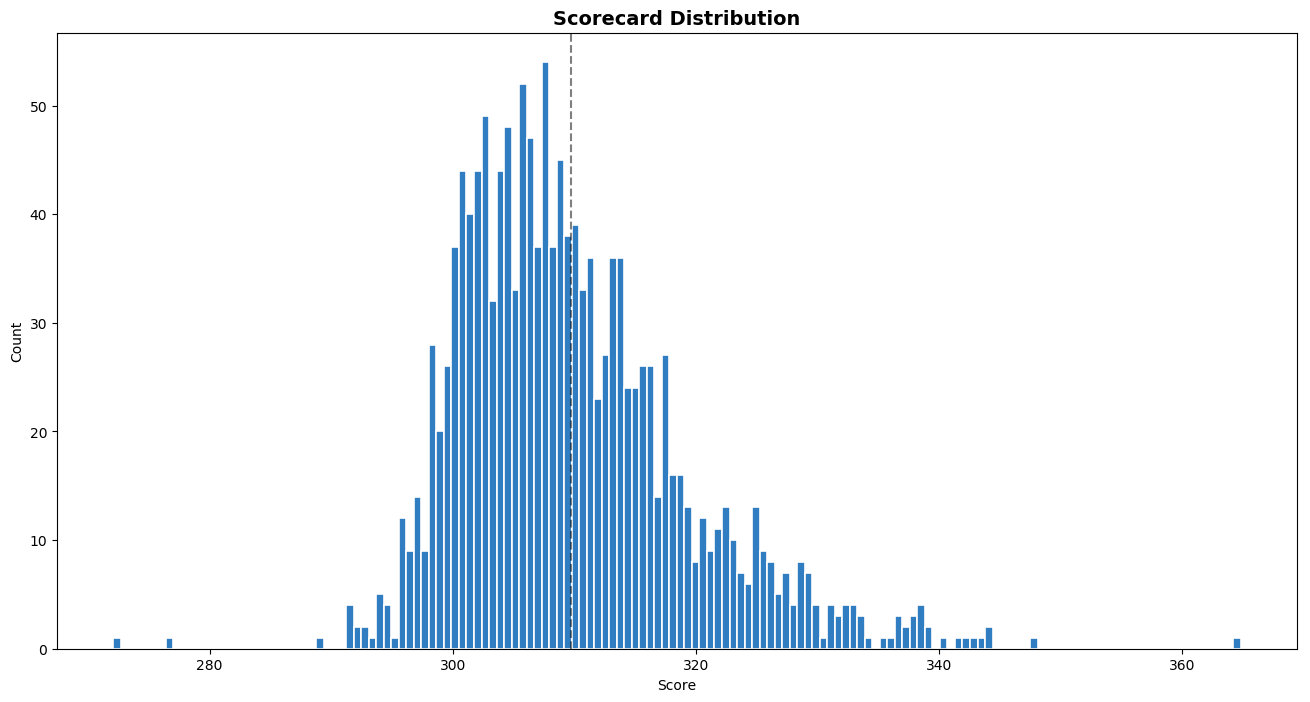

In [375]:
# Plot Distribution of Scores
plt.figure(figsize=(16,8))

plt.hist(scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(scorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
#plt.text(48, 297, 'Mean Score: 361', color='red', fontweight='bold', style='italic', fontsize=8)
plt.xlabel('Score')
plt.ylabel('Count');

### We can infer from the rejected population that it has score less than 330 and are likely to default.

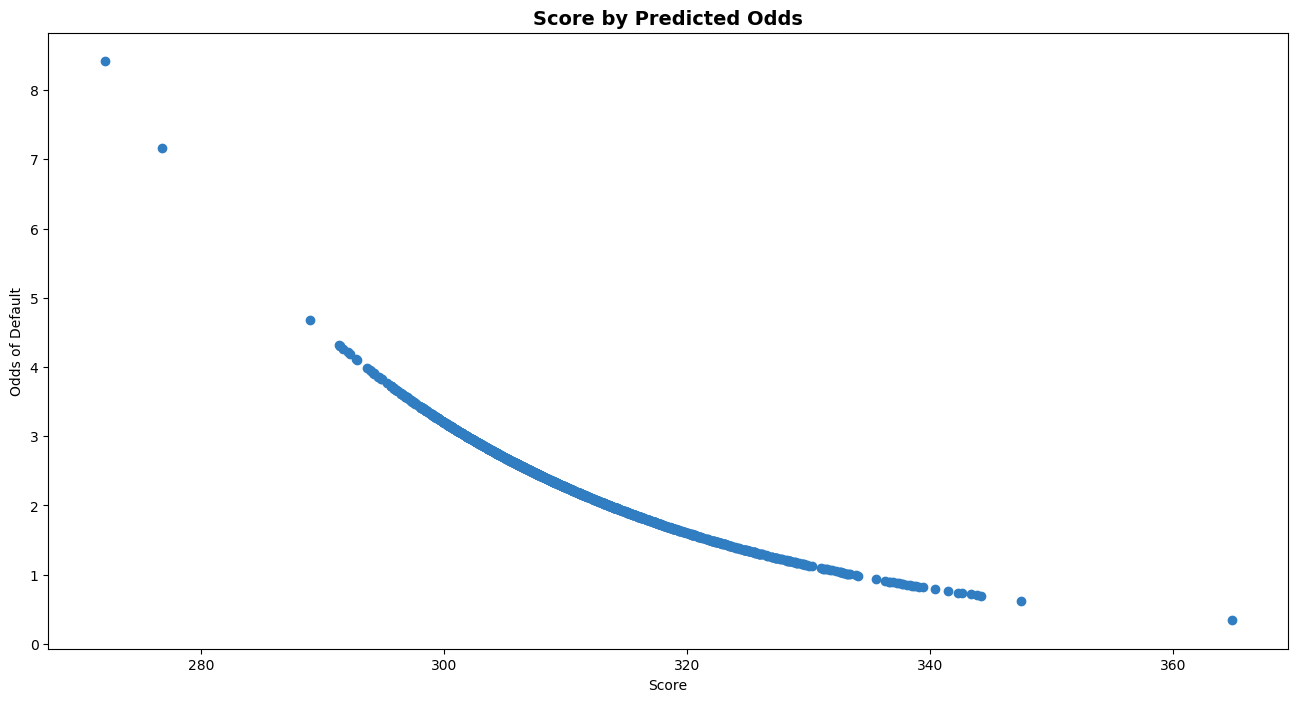

In [376]:


# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=scorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds of Default');



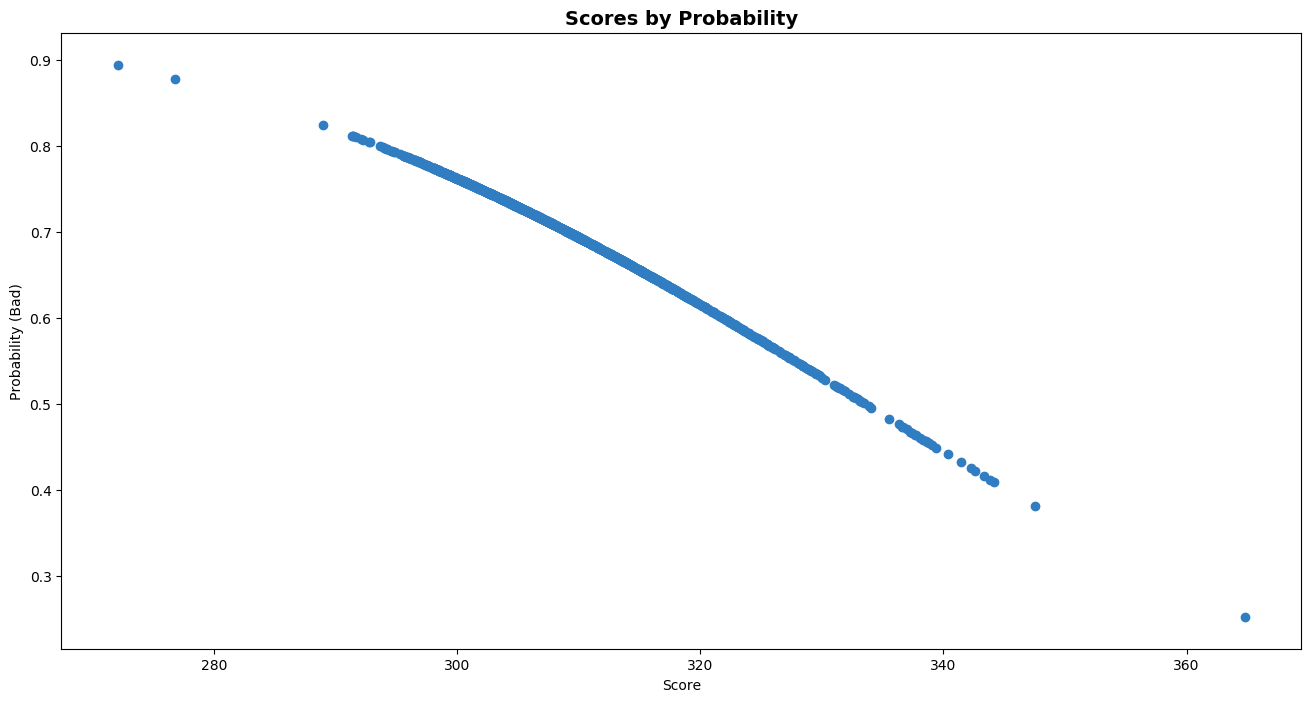

In [377]:
# Plot Scores Against Probabilities
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Bad)');

### Accessing the Financial benefits of the model.
#### General assumptions
- We dont have any recovery details and probability of recovery , so assuming that we are not able to recover anything from the prospects and probability of recovery is 0 and loss probability is 1.
##### Expected Loss per customers = Outstanding Balance * Probability of Bad  * ( 1- Recovery Probability)


### Model Approval or rejection Average.
- If our focus is reject risky candidates we will focus on sensivity of the model and it is 65 % . So the average Automatic rejection rate is 65%
- If our focus is auto approval then we will focus on specificity of the model and it is 60 % . So the average Automatic Approval rate is 60%

### Average Loss per customer(good and bad) as predicted by Logistic regression is Rs 567416

In [396]:
# Calculating average loss for all customers 

#loss_df = pd.merge(scorecard_lr, cred_bureau, left_on='Application_id', right_on='Application ID',suffixes=('_score', '_cred'))['Application_id','Outstanding Balance_cred','Default','probs']
loss_df = pd.merge(scorecard_lr, cred_bureau, left_on='Application_id', right_on='Application ID',suffixes=('_score', '_cred'))
#loss_df.isnull().sum()
loss_df['loss']=loss_df['Outstanding Balance_cred']*loss_df['probs']
loss_df['loss'].mean()

567416.4898127348

### Average Loss per customer(bad) as predicted by Logistic regression is Rs 698355

In [397]:
# Calculating average loss for bad customers

loss_df = pd.merge(scorecard_lr[scorecard_lr['Default']==1.0], cred_bureau, left_on='Application_id', right_on='Application ID',suffixes=('_score', '_cred'))
#loss_df.isnull().sum()
loss_df['loss']=loss_df['Outstanding Balance_cred']*loss_df['probs']
loss_df['loss'].mean()

698355.0456980289

### Loss that can be saved with the help of model by predicting the defaults is Rs 2403368501

In [398]:
# Calculating loss for bad customers than can be saved with the help of model

loss_df = pd.merge(scorecard_lr[scorecard_lr['Default']==1.0], cred_bureau, left_on='Application_id', right_on='Application ID',suffixes=('_score', '_cred'))
#loss_df.isnull().sum()
loss_df['loss']=loss_df['Outstanding Balance_cred']
loss_df['loss'].sum()*0.65

2403368501.3

#### Average revenue loss per customer using this model is Rs 561631

In [395]:
# Revenue loss per customer for good customer that will occur for using this model.

loss_df = pd.merge(scorecard_lr[scorecard_lr['Default']==0.0], cred_bureau, left_on='Application_id', right_on='Application ID',suffixes=('_score', '_cred'))
#loss_df.isnull().sum()
loss_df['loss']=loss_df['Outstanding Balance_cred']*loss_df['probs']
loss_df['loss'].mean()

561631.865390396

In [399]:
loss_df = pd.merge(scorecard_lr[scorecard_lr['Default']==0.0], cred_bureau, left_on='Application_id', right_on='Application ID',suffixes=('_score', '_cred'))
#loss_df.isnull().sum()
loss_df['loss']=loss_df['Outstanding Balance_cred']
loss_df['loss'].sum()

83095286668.0

## As  the specivicity of our model is 60 %, so there will be revenue loss associated with our model and it will be 40% of our total revenue.